In [2]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import TomekLinks

from imblearn.pipeline import Pipeline

# 모델
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# 모델 평가 
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve, 
                             auc, precision_recall_curve, accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix)

from sklearn.model_selection import learning_curve

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from matplotlib import rc
%matplotlib inline
rc('font', family='Arial Unicode MS')

#### 함수들

In [2]:
'''# 분류기 성능 return
def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)

    return acc, pre, re, f1, auc

# 성능 출력
def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)

    print('=> confusion matrix')
    print(confusion)
    print('======================')

    print('Accuracy: {0:.4f}, Precision: {1:.4f}'.format(acc, pre))
    print('Recall: {0:.4f}, F1: {1:.4f}, AUC: {2:.4f}'.format(re, f1, auc))

# 모델과 데이터를 주면 성능 출력
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    return get_clf_eval(y_test, pred)

# 다수의 모델의 성능을 정리해어 df으로 반환
def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    tmp = []

    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))

    return pd.DataFrame(tmp, columns=col_names, index=model_names)

import matplotlib.pyplot as plt

def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(10, 10))

    for model in range(len(models)):
        pred = models[model].predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label=model_names[model])

    plt.plot([0, 1], [0, 1], 'k--', label='random guess')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show()'''

"# 분류기 성능 return\ndef get_clf_eval(y_test, pred):\n    acc = accuracy_score(y_test, pred)\n    pre = precision_score(y_test, pred)\n    re = recall_score(y_test, pred)\n    f1 = f1_score(y_test, pred)\n    auc = roc_auc_score(y_test, pred)\n\n    return acc, pre, re, f1, auc\n\n# 성능 출력\ndef print_clf_eval(y_test, pred):\n    confusion = confusion_matrix(y_test, pred)\n    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)\n\n    print('=> confusion matrix')\n    print(confusion)\n    print('======================')\n\n    print('Accuracy: {0:.4f}, Precision: {1:.4f}'.format(acc, pre))\n    print('Recall: {0:.4f}, F1: {1:.4f}, AUC: {2:.4f}'.format(re, f1, auc))\n\n# 모델과 데이터를 주면 성능 출력\ndef get_result(model, X_train, y_train, X_test, y_test):\n    model.fit(X_train, y_train)\n    pred = model.predict(X_test)\n\n    return get_clf_eval(y_test, pred)\n\n# 다수의 모델의 성능을 정리해어 df으로 반환\ndef get_result_pd(models, model_names, X_train, y_train, X_test, y_test):\n    col_names = ['accuracy', 'precis

# 1. 데이터 준비

In [3]:
data = pd.read_csv('./CVD_cleaned.csv')

#data.loc[(data['Age_Category']=='18-24') | (data['Age_Category']=='25-29'), 'Age_Category'] = '18-29'
#data.loc[(data['Age_Category']=='30-34') | (data['Age_Category']=='35-39'), 'Age_Category'] = '30-39'
#data.loc[(data['Age_Category']=='40-44') | (data['Age_Category']=='45-49'), 'Age_Category'] = '40-49'
#data.loc[(data['Age_Category']=='50-54') | (data['Age_Category']=='55-59'), 'Age_Category'] = '50-59'
#data.loc[(data['Age_Category']=='60-64') | (data['Age_Category']=='65-69'), 'Age_Category'] = '60-69'
#data.loc[(data['Age_Category']=='70-74') | (data['Age_Category']=='75-79'), 'Age_Category'] = '70-79'

# Trial 1
- age category 5단위
- outlier 제거 x
- scaling x
- resampling x
- gridsearch x

  model_names  accuracy  precision    recall        f1   roc_auc
0      lr_clf  0.918862   0.488220  0.074690  0.129559  0.533902
1      dt_clf  0.863901   0.206029  0.239487  0.221502  0.579155
2      rf_clf  0.918117   0.437008  0.044453  0.080698  0.519708
3    lgbm_clf  0.919914   0.575563  0.035843  0.067484  0.516759
4     xgb_clf  0.918975   0.490018  0.054065  0.097385  0.524558


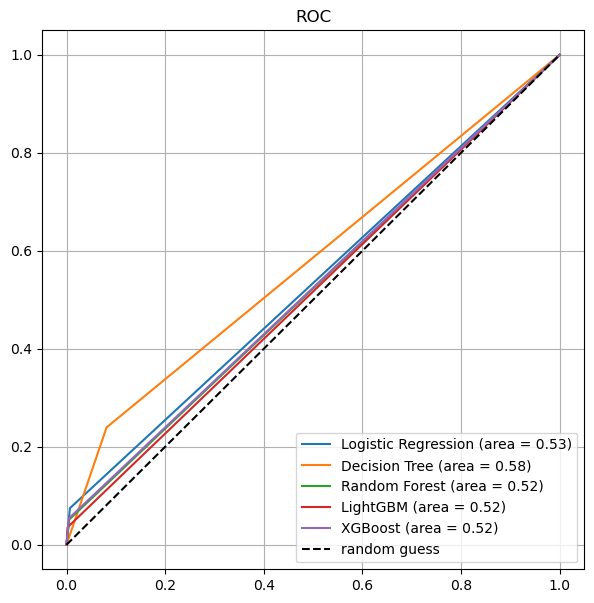

In [3]:
data = pd.read_csv('./CVD_cleaned.csv')

# 성별 원핫인코딩
data = pd.get_dummies(data, columns=['Sex'])
sex_columns = ['Sex_Female', 'Sex_Male']
for column in sex_columns:
    data[column] = data[column].map({True: 1, False: 0})

# Yes, No -> 1, 0
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 
                  'Depression', 'Arthritis', 'Smoking_History','Exercise']

# diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Arthritis, Smoking_History, Exercise
for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}

data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 1,
    'Within the past 5 years': 2,
    'Within the past 2 years': 3,
    'Within the past year': 4
    
}
data['Checkup'] = data['Checkup'].map(checkup_mapping)

# {'18-29', '30-39', '40-49', '50-59', '60-69', '75-79', '80+'}
age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)    

X = data.drop("Heart_Disease", axis = 1)
y = data['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

tmp = []




# LR
lr_clf = LogisticRegression(random_state=13)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

acc = accuracy_score(y_test, lr_pred)
pre = precision_score(y_test, lr_pred)
re = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
aucc = roc_auc_score(y_test, lr_pred)

# 결과 df로 저장
tmp.append(['lr_clf', acc, pre, re, f1, aucc])

# AUC
pred = lr_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr1, tpr1, thresholds = roc_curve(y_test, binary_pred)
roc_auc1 = auc(fpr1, tpr1)






# DT
dt_clf = DecisionTreeClassifier(random_state=13)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

acc = accuracy_score(y_test, dt_pred)
pre = precision_score(y_test, dt_pred)
re = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
aucc = roc_auc_score(y_test, dt_pred)

tmp.append(['dt_clf', acc, pre, re, f1, aucc])

pred = dt_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr2, tpr2, thresholds = roc_curve(y_test, binary_pred)
roc_auc2 = auc(fpr2, tpr2)






# RF
rf_clf = RandomForestClassifier(random_state=13)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

acc = accuracy_score(y_test, rf_pred)
pre = precision_score(y_test, rf_pred)
re = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
aucc = roc_auc_score(y_test, rf_pred)

tmp.append(['rf_clf', acc, pre, re, f1, aucc])

pred = rf_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr3, tpr3, thresholds = roc_curve(y_test, binary_pred)
roc_auc3 = auc(fpr3, tpr3)





# LGBM
lgbm_clf = LGBMClassifier(random_state=13)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

acc = accuracy_score(y_test, lgbm_pred)
pre = precision_score(y_test, lgbm_pred)
re = recall_score(y_test, lgbm_pred)
f1 = f1_score(y_test, lgbm_pred)
aucc = roc_auc_score(y_test, lgbm_pred)

tmp.append(['lgbm_clf', acc, pre, re, f1, aucc])

pred = lgbm_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr4, tpr4, thresholds = roc_curve(y_test, binary_pred)
roc_auc4 = auc(fpr4, tpr4)




# XGBoost
xgb_clf = XGBClassifier(random_sate=13)

xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

acc = accuracy_score(y_test, xgb_pred)
pre = precision_score(y_test, xgb_pred)
re = recall_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
aucc = roc_auc_score(y_test, xgb_pred)

tmp.append(['xgb_clf', acc, pre, re, f1, aucc])

pred = xgb_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr5, tpr5, thresholds = roc_curve(y_test, binary_pred)
roc_auc5 = auc(fpr5, tpr5)



col_names = ['model_names', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
df = pd.DataFrame(tmp, columns=col_names)
print(df)

plt.figure(figsize=(7, 7))

plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Decision Tree (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Random Forest (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='LightGBM (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label='XGBoost (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.title('ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Trial 2
- age category 10단위
- outlier 제거 x
- scaling x
- resampling x
- gridsearch x

> 유의미한 차이를 보이지 않음. 

  model_names  accuracy  precision    recall        f1   roc_auc
0      lr_clf  0.919363   0.510078  0.065879  0.116687  0.530157
1      dt_clf  0.862605   0.200686  0.234481  0.216271  0.576168
2      rf_clf  0.918651   0.469548  0.047857  0.086862  0.521551
3    lgbm_clf  0.919639   0.548077  0.034241  0.064455  0.515879
4     xgb_clf  0.919234   0.504638  0.054465  0.098319  0.524881


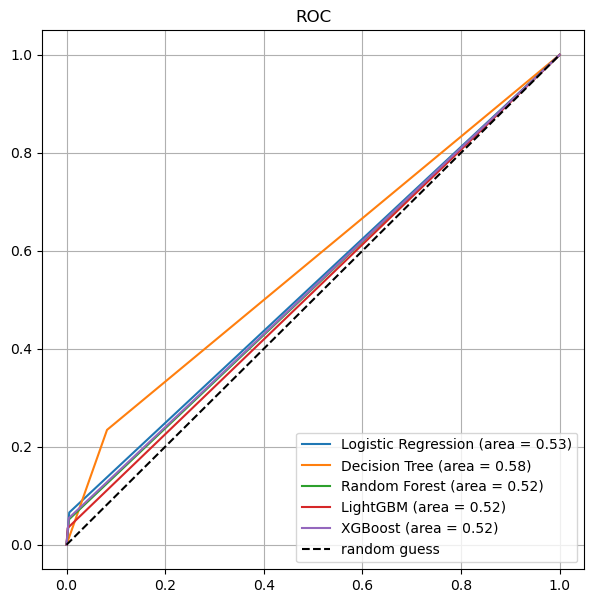

In [4]:
data = pd.read_csv('./CVD_cleaned.csv')

# age category 변경
data.loc[(data['Age_Category']=='18-24') | (data['Age_Category']=='25-29'), 'Age_Category'] = '18-29'
data.loc[(data['Age_Category']=='30-34') | (data['Age_Category']=='35-39'), 'Age_Category'] = '30-39'
data.loc[(data['Age_Category']=='40-44') | (data['Age_Category']=='45-49'), 'Age_Category'] = '40-49'
data.loc[(data['Age_Category']=='50-54') | (data['Age_Category']=='55-59'), 'Age_Category'] = '50-59'
data.loc[(data['Age_Category']=='60-64') | (data['Age_Category']=='65-69'), 'Age_Category'] = '60-69'
data.loc[(data['Age_Category']=='70-74') | (data['Age_Category']=='75-79'), 'Age_Category'] = '70-79'



# 성별 원핫인코딩
data = pd.get_dummies(data, columns=['Sex'])
sex_columns = ['Sex_Female', 'Sex_Male']
for column in sex_columns:
    data[column] = data[column].map({True: 1, False: 0})

# Yes, No -> 1, 0
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 
                  'Depression', 'Arthritis', 'Smoking_History','Exercise']

# diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Arthritis, Smoking_History, Exercise
for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}

data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 1,
    'Within the past 5 years': 2,
    'Within the past 2 years': 3,
    'Within the past year': 4
    
}
data['Checkup'] = data['Checkup'].map(checkup_mapping)

# {'18-29', '30-39', '40-49', '50-59', '60-69', '75-79', '80+'}
age_category_mapping = {
    '18-29': 0,
    '30-39': 1,
    '40-49': 2,
    '50-59': 3,
    '60-69': 4,
    '70-79': 5,
    '80+': 6
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)    

X = data.drop("Heart_Disease", axis = 1)
y = data['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

tmp = []




# LR
lr_clf = LogisticRegression(random_state=13)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

acc = accuracy_score(y_test, lr_pred)
pre = precision_score(y_test, lr_pred)
re = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
aucc = roc_auc_score(y_test, lr_pred)

# 결과 df로 저장
tmp.append(['lr_clf', acc, pre, re, f1, aucc])

# AUC
pred = lr_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr1, tpr1, thresholds = roc_curve(y_test, binary_pred)
roc_auc1 = auc(fpr1, tpr1)






# DT
dt_clf = DecisionTreeClassifier(random_state=13)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

acc = accuracy_score(y_test, dt_pred)
pre = precision_score(y_test, dt_pred)
re = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
aucc = roc_auc_score(y_test, dt_pred)

tmp.append(['dt_clf', acc, pre, re, f1, aucc])

pred = dt_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr2, tpr2, thresholds = roc_curve(y_test, binary_pred)
roc_auc2 = auc(fpr2, tpr2)






# RF
rf_clf = RandomForestClassifier(random_state=13)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

acc = accuracy_score(y_test, rf_pred)
pre = precision_score(y_test, rf_pred)
re = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
aucc = roc_auc_score(y_test, rf_pred)

tmp.append(['rf_clf', acc, pre, re, f1, aucc])

pred = rf_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr3, tpr3, thresholds = roc_curve(y_test, binary_pred)
roc_auc3 = auc(fpr3, tpr3)





# LGBM
lgbm_clf = LGBMClassifier(random_state=13)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

acc = accuracy_score(y_test, lgbm_pred)
pre = precision_score(y_test, lgbm_pred)
re = recall_score(y_test, lgbm_pred)
f1 = f1_score(y_test, lgbm_pred)
aucc = roc_auc_score(y_test, lgbm_pred)

tmp.append(['lgbm_clf', acc, pre, re, f1, aucc])

pred = lgbm_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr4, tpr4, thresholds = roc_curve(y_test, binary_pred)
roc_auc4 = auc(fpr4, tpr4)




# XGBoost
xgb_clf = XGBClassifier(random_sate=13)

xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

acc = accuracy_score(y_test, xgb_pred)
pre = precision_score(y_test, xgb_pred)
re = recall_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
aucc = roc_auc_score(y_test, xgb_pred)

tmp.append(['xgb_clf', acc, pre, re, f1, aucc])

pred = xgb_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr5, tpr5, thresholds = roc_curve(y_test, binary_pred)
roc_auc5 = auc(fpr5, tpr5)



col_names = ['model_names', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
df = pd.DataFrame(tmp, columns=col_names)
print(df)

plt.figure(figsize=(7, 7))

plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Decision Tree (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Random Forest (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='LightGBM (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label='XGBoost (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.title('ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Trial 3
- age category 5단위
- bmi outlier 제거 o
- scaling x
- resampling x
- gridsearch x

>유의미한 차이를 보이지 않음.

  model_names  accuracy  precision    recall        f1   roc_auc
0      lr_clf  0.920037   0.527187  0.046362  0.085228  0.521365
1      dt_clf  0.862240   0.193399  0.225364  0.208161  0.571623
2      rf_clf  0.919051   0.459459  0.042412  0.077655  0.519026
3    lgbm_clf  0.920421   0.587121  0.032225  0.061096  0.515122
4     xgb_clf  0.919001   0.462136  0.049480  0.089390  0.522224


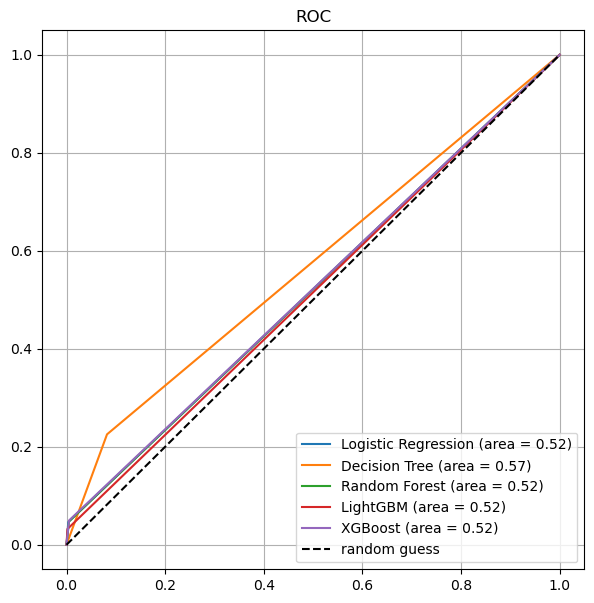

In [70]:
data = pd.read_csv('./CVD_cleaned.csv')

# outlier 제거
# outlier를 제거할 column
selected_columns = ['BMI']

# IQR 계산
Q1 = data[selected_columns].quantile(0.25)
Q3 = data[selected_columns].quantile(0.75)
IQR = Q3 - Q1

# weight
threshold = 1.5

outlier_mask = (
    (data[selected_columns] < (Q1 - threshold * IQR)) |
    (data[selected_columns] > (Q3 + threshold * IQR))
).any(axis=1)

# outlier 제거
data_nooutlier = data[~outlier_mask]
data = data_nooutlier




# 성별 원핫인코딩
data = pd.get_dummies(data, columns=['Sex'])
sex_columns = ['Sex_Female', 'Sex_Male']
for column in sex_columns:
    data[column] = data[column].map({True: 1, False: 0})

# Yes, No -> 1, 0
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 
                  'Depression', 'Arthritis', 'Smoking_History','Exercise']

# diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Arthritis, Smoking_History, Exercise
for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}

data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 1,
    'Within the past 5 years': 2,
    'Within the past 2 years': 3,
    'Within the past year': 4
    
}
data['Checkup'] = data['Checkup'].map(checkup_mapping)



age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)    

X = data.drop("Heart_Disease", axis = 1)
y = data['Heart_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

tmp = []




# LR
lr_clf = LogisticRegression(random_state=13)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

acc = accuracy_score(y_test, lr_pred)
pre = precision_score(y_test, lr_pred)
re = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
aucc = roc_auc_score(y_test, lr_pred)

# 결과 df로 저장
tmp.append(['lr_clf', acc, pre, re, f1, aucc])

# AUC
pred = lr_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr1, tpr1, thresholds = roc_curve(y_test, binary_pred)
roc_auc1 = auc(fpr1, tpr1)






# DT
dt_clf = DecisionTreeClassifier(random_state=13)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

acc = accuracy_score(y_test, dt_pred)
pre = precision_score(y_test, dt_pred)
re = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
aucc = roc_auc_score(y_test, dt_pred)

tmp.append(['dt_clf', acc, pre, re, f1, aucc])

pred = dt_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr2, tpr2, thresholds = roc_curve(y_test, binary_pred)
roc_auc2 = auc(fpr2, tpr2)






# RF
rf_clf = RandomForestClassifier(random_state=13)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

acc = accuracy_score(y_test, rf_pred)
pre = precision_score(y_test, rf_pred)
re = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
aucc = roc_auc_score(y_test, rf_pred)

tmp.append(['rf_clf', acc, pre, re, f1, aucc])

pred = rf_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr3, tpr3, thresholds = roc_curve(y_test, binary_pred)
roc_auc3 = auc(fpr3, tpr3)





# LGBM
lgbm_clf = LGBMClassifier(random_state=13)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

acc = accuracy_score(y_test, lgbm_pred)
pre = precision_score(y_test, lgbm_pred)
re = recall_score(y_test, lgbm_pred)
f1 = f1_score(y_test, lgbm_pred)
aucc = roc_auc_score(y_test, lgbm_pred)

tmp.append(['lgbm_clf', acc, pre, re, f1, aucc])

pred = lgbm_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr4, tpr4, thresholds = roc_curve(y_test, binary_pred)
roc_auc4 = auc(fpr4, tpr4)




# XGBoost
xgb_clf = XGBClassifier(random_sate=13)

xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

acc = accuracy_score(y_test, xgb_pred)
pre = precision_score(y_test, xgb_pred)
re = recall_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
aucc = roc_auc_score(y_test, xgb_pred)

tmp.append(['xgb_clf', acc, pre, re, f1, aucc])

pred = xgb_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr5, tpr5, thresholds = roc_curve(y_test, binary_pred)
roc_auc5 = auc(fpr5, tpr5)



col_names = ['model_names', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
df = pd.DataFrame(tmp, columns=col_names)
print(df)

plt.figure(figsize=(7, 7))

plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Decision Tree (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Random Forest (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='LightGBM (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label='XGBoost (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.title('ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Trial 4
- age category 5단위
- bmi outlier 제거 x
- scaling o: StandardScaler()
- resampling x
- gridsearch x

>유의미한 차이를 보이지 않음. 아주 약간 좋아짐. 

  model_names  accuracy  precision    recall        f1   roc_auc
0      lr_clf  0.919234   0.503975  0.063476  0.112751  0.528990
1      dt_clf  0.864176   0.207443  0.241089  0.223004  0.580035
2      rf_clf  0.918295   0.448141  0.045855  0.083197  0.520444
3    lgbm_clf  0.919979   0.584158  0.035443  0.066830  0.516612
4     xgb_clf  0.918975   0.490018  0.054065  0.097385  0.524558


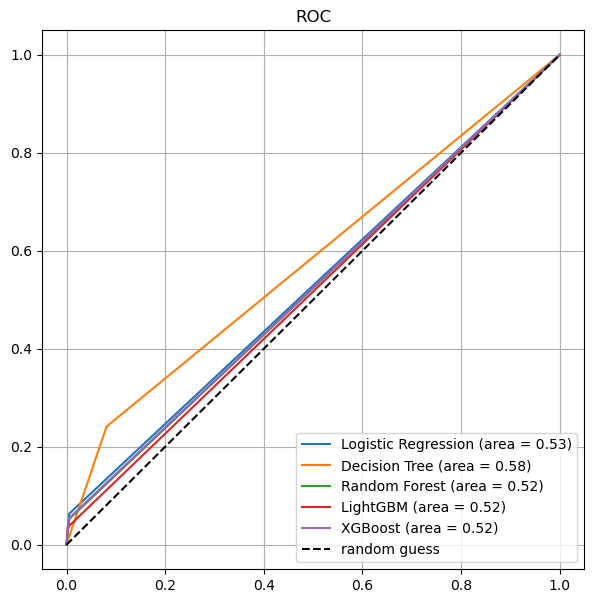

In [5]:
data = pd.read_csv('./CVD_cleaned.csv')

# 성별 원핫인코딩
data = pd.get_dummies(data, columns=['Sex'])
sex_columns = ['Sex_Female', 'Sex_Male']
for column in sex_columns:
    data[column] = data[column].map({True: 1, False: 0})

# Yes, No -> 1, 0
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 
                  'Depression', 'Arthritis', 'Smoking_History','Exercise']

# diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Arthritis, Smoking_History, Exercise
for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}

data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 1,
    'Within the past 5 years': 2,
    'Within the past 2 years': 3,
    'Within the past year': 4
    
}
data['Checkup'] = data['Checkup'].map(checkup_mapping)



age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)    

X = data.drop("Heart_Disease", axis = 1)
y = data['Heart_Disease']




# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)



# scaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)









tmp = []
# LR
lr_clf = LogisticRegression(random_state=13)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

acc = accuracy_score(y_test, lr_pred)
pre = precision_score(y_test, lr_pred)
re = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
aucc = roc_auc_score(y_test, lr_pred)

# 결과 df로 저장
tmp.append(['lr_clf', acc, pre, re, f1, aucc])

# AUC
pred = lr_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr1, tpr1, thresholds = roc_curve(y_test, binary_pred)
roc_auc1 = auc(fpr1, tpr1)






# DT
dt_clf = DecisionTreeClassifier(random_state=13)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

acc = accuracy_score(y_test, dt_pred)
pre = precision_score(y_test, dt_pred)
re = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
aucc = roc_auc_score(y_test, dt_pred)

tmp.append(['dt_clf', acc, pre, re, f1, aucc])

pred = dt_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr2, tpr2, thresholds = roc_curve(y_test, binary_pred)
roc_auc2 = auc(fpr2, tpr2)






# RF
rf_clf = RandomForestClassifier(random_state=13)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

acc = accuracy_score(y_test, rf_pred)
pre = precision_score(y_test, rf_pred)
re = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
aucc = roc_auc_score(y_test, rf_pred)

tmp.append(['rf_clf', acc, pre, re, f1, aucc])

pred = rf_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr3, tpr3, thresholds = roc_curve(y_test, binary_pred)
roc_auc3 = auc(fpr3, tpr3)





# LGBM
lgbm_clf = LGBMClassifier(random_state=13)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

acc = accuracy_score(y_test, lgbm_pred)
pre = precision_score(y_test, lgbm_pred)
re = recall_score(y_test, lgbm_pred)
f1 = f1_score(y_test, lgbm_pred)
aucc = roc_auc_score(y_test, lgbm_pred)

tmp.append(['lgbm_clf', acc, pre, re, f1, aucc])

pred = lgbm_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr4, tpr4, thresholds = roc_curve(y_test, binary_pred)
roc_auc4 = auc(fpr4, tpr4)




# XGBoost
xgb_clf = XGBClassifier(random_sate=13)

xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

acc = accuracy_score(y_test, xgb_pred)
pre = precision_score(y_test, xgb_pred)
re = recall_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
aucc = roc_auc_score(y_test, xgb_pred)

tmp.append(['xgb_clf', acc, pre, re, f1, aucc])

pred = xgb_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr5, tpr5, thresholds = roc_curve(y_test, binary_pred)
roc_auc5 = auc(fpr5, tpr5)



col_names = ['model_names', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
df = pd.DataFrame(tmp, columns=col_names)
print(df)

plt.figure(figsize=(7, 7))

plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Decision Tree (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Random Forest (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='LightGBM (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label='XGBoost (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.title('ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Trial 5
- age category 5단위
- bmi outlier 제거 x
- scaling o: MinMaxScaler()
- resampling x
- gridsearch x
>유의미한 차이를 보이지 않음.

  model_names  accuracy  precision    recall        f1   roc_auc
0      lr_clf  0.919363   0.510467  0.063476  0.112912  0.529061
1      dt_clf  0.863771   0.205948  0.239888  0.221626  0.579267
2      rf_clf  0.918214   0.442688  0.044854  0.081455  0.519944
3    lgbm_clf  0.919914   0.575563  0.035843  0.067484  0.516759
4     xgb_clf  0.918975   0.490018  0.054065  0.097385  0.524558


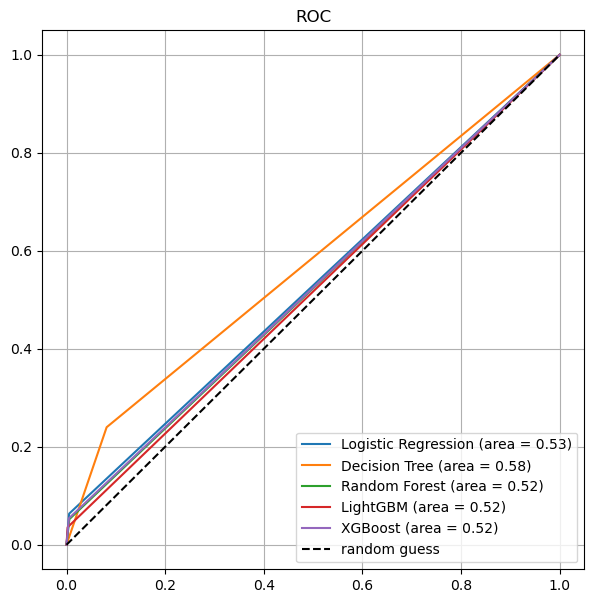

In [72]:
data = pd.read_csv('./CVD_cleaned.csv')



# 성별 원핫인코딩
data = pd.get_dummies(data, columns=['Sex'])
sex_columns = ['Sex_Female', 'Sex_Male']
for column in sex_columns:
    data[column] = data[column].map({True: 1, False: 0})

# Yes, No -> 1, 0
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 
                  'Depression', 'Arthritis', 'Smoking_History','Exercise']

# diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Arthritis, Smoking_History, Exercise
for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}

data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 1,
    'Within the past 5 years': 2,
    'Within the past 2 years': 3,
    'Within the past year': 4
    
}
data['Checkup'] = data['Checkup'].map(checkup_mapping)



age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)    

X = data.drop("Heart_Disease", axis = 1)
y = data['Heart_Disease']




# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)



# scaler
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)









tmp = []
# LR
lr_clf = LogisticRegression(random_state=13)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

acc = accuracy_score(y_test, lr_pred)
pre = precision_score(y_test, lr_pred)
re = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
aucc = roc_auc_score(y_test, lr_pred)

# 결과 df로 저장
tmp.append(['lr_clf', acc, pre, re, f1, aucc])

# AUC
pred = lr_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr1, tpr1, thresholds = roc_curve(y_test, binary_pred)
roc_auc1 = auc(fpr1, tpr1)






# DT
dt_clf = DecisionTreeClassifier(random_state=13)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

acc = accuracy_score(y_test, dt_pred)
pre = precision_score(y_test, dt_pred)
re = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
aucc = roc_auc_score(y_test, dt_pred)

tmp.append(['dt_clf', acc, pre, re, f1, aucc])

pred = dt_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr2, tpr2, thresholds = roc_curve(y_test, binary_pred)
roc_auc2 = auc(fpr2, tpr2)






# RF
rf_clf = RandomForestClassifier(random_state=13)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

acc = accuracy_score(y_test, rf_pred)
pre = precision_score(y_test, rf_pred)
re = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
aucc = roc_auc_score(y_test, rf_pred)

tmp.append(['rf_clf', acc, pre, re, f1, aucc])

pred = rf_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr3, tpr3, thresholds = roc_curve(y_test, binary_pred)
roc_auc3 = auc(fpr3, tpr3)





# LGBM
lgbm_clf = LGBMClassifier(random_state=13)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

acc = accuracy_score(y_test, lgbm_pred)
pre = precision_score(y_test, lgbm_pred)
re = recall_score(y_test, lgbm_pred)
f1 = f1_score(y_test, lgbm_pred)
aucc = roc_auc_score(y_test, lgbm_pred)

tmp.append(['lgbm_clf', acc, pre, re, f1, aucc])

pred = lgbm_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr4, tpr4, thresholds = roc_curve(y_test, binary_pred)
roc_auc4 = auc(fpr4, tpr4)




# XGBoost
xgb_clf = XGBClassifier(random_sate=13)

xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

acc = accuracy_score(y_test, xgb_pred)
pre = precision_score(y_test, xgb_pred)
re = recall_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
aucc = roc_auc_score(y_test, xgb_pred)

tmp.append(['xgb_clf', acc, pre, re, f1, aucc])

pred = xgb_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr5, tpr5, thresholds = roc_curve(y_test, binary_pred)
roc_auc5 = auc(fpr5, tpr5)



col_names = ['model_names', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
df = pd.DataFrame(tmp, columns=col_names)
print(df)

plt.figure(figsize=(7, 7))

plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Decision Tree (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Random Forest (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='LightGBM (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label='XGBoost (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.title('ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Trial 6
- age category 5단위
- bmi outlier 제거 x
- scaling o: RobustScaler()
- resampling x
- gridsearch x
>유의미한 차이를 보이지 않음.

  model_names  accuracy  precision    recall        f1   roc_auc
0      lr_clf  0.919234   0.503975  0.063476  0.112751  0.528990
1      dt_clf  0.864079   0.206116  0.238887  0.221295  0.578978
2      rf_clf  0.918214   0.443137  0.045254  0.082122  0.520126
3    lgbm_clf  0.920027   0.590000  0.035443  0.066868  0.516638
4     xgb_clf  0.918975   0.490018  0.054065  0.097385  0.524558


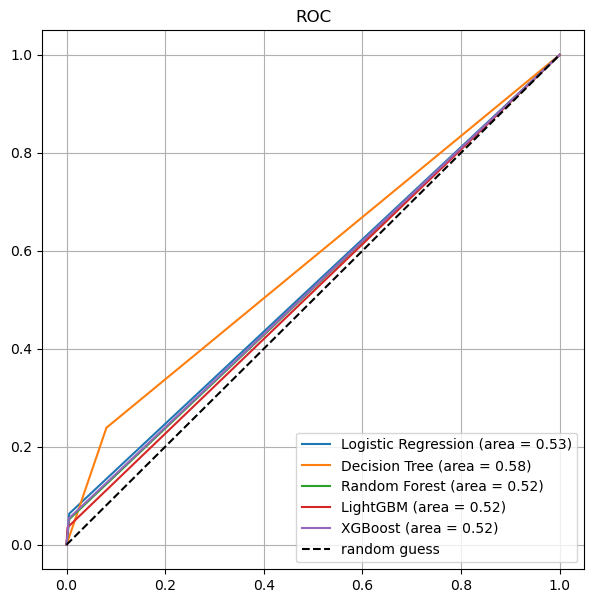

In [74]:
data = pd.read_csv('./CVD_cleaned.csv')



# 성별 원핫인코딩
data = pd.get_dummies(data, columns=['Sex'])
sex_columns = ['Sex_Female', 'Sex_Male']
for column in sex_columns:
    data[column] = data[column].map({True: 1, False: 0})

# Yes, No -> 1, 0
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 
                  'Depression', 'Arthritis', 'Smoking_History','Exercise']

# diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Arthritis, Smoking_History, Exercise
for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}

data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 1,
    'Within the past 5 years': 2,
    'Within the past 2 years': 3,
    'Within the past year': 4
    
}
data['Checkup'] = data['Checkup'].map(checkup_mapping)



age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)    

X = data.drop("Heart_Disease", axis = 1)
y = data['Heart_Disease']




# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)



# scaler
scaler = RobustScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)









tmp = []
# LR
lr_clf = LogisticRegression(random_state=13)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

acc = accuracy_score(y_test, lr_pred)
pre = precision_score(y_test, lr_pred)
re = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
aucc = roc_auc_score(y_test, lr_pred)

# 결과 df로 저장
tmp.append(['lr_clf', acc, pre, re, f1, aucc])

# AUC
pred = lr_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr1, tpr1, thresholds = roc_curve(y_test, binary_pred)
roc_auc1 = auc(fpr1, tpr1)






# DT
dt_clf = DecisionTreeClassifier(random_state=13)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

acc = accuracy_score(y_test, dt_pred)
pre = precision_score(y_test, dt_pred)
re = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
aucc = roc_auc_score(y_test, dt_pred)

tmp.append(['dt_clf', acc, pre, re, f1, aucc])

pred = dt_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr2, tpr2, thresholds = roc_curve(y_test, binary_pred)
roc_auc2 = auc(fpr2, tpr2)






# RF
rf_clf = RandomForestClassifier(random_state=13)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

acc = accuracy_score(y_test, rf_pred)
pre = precision_score(y_test, rf_pred)
re = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
aucc = roc_auc_score(y_test, rf_pred)

tmp.append(['rf_clf', acc, pre, re, f1, aucc])

pred = rf_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr3, tpr3, thresholds = roc_curve(y_test, binary_pred)
roc_auc3 = auc(fpr3, tpr3)





# LGBM
lgbm_clf = LGBMClassifier(random_state=13)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

acc = accuracy_score(y_test, lgbm_pred)
pre = precision_score(y_test, lgbm_pred)
re = recall_score(y_test, lgbm_pred)
f1 = f1_score(y_test, lgbm_pred)
aucc = roc_auc_score(y_test, lgbm_pred)

tmp.append(['lgbm_clf', acc, pre, re, f1, aucc])

pred = lgbm_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr4, tpr4, thresholds = roc_curve(y_test, binary_pred)
roc_auc4 = auc(fpr4, tpr4)




# XGBoost
xgb_clf = XGBClassifier(random_sate=13)

xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

acc = accuracy_score(y_test, xgb_pred)
pre = precision_score(y_test, xgb_pred)
re = recall_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
aucc = roc_auc_score(y_test, xgb_pred)

tmp.append(['xgb_clf', acc, pre, re, f1, aucc])

pred = xgb_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr5, tpr5, thresholds = roc_curve(y_test, binary_pred)
roc_auc5 = auc(fpr5, tpr5)



col_names = ['model_names', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
df = pd.DataFrame(tmp, columns=col_names)
print(df)

plt.figure(figsize=(7, 7))

plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Decision Tree (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Random Forest (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='LightGBM (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label='XGBoost (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.title('ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Trial 7
- age category 5단위
- bmi outlier 제거 x
- scaling x
- resampling o: SMOTE
- gridsearch x
>성능 좋아짐. 

  model_names  accuracy  precision    recall        f1   roc_auc
0      lr_clf  0.787619   0.201484  0.549059  0.294791  0.678830
1      dt_clf  0.833919   0.182334  0.302563  0.227543  0.591609
2      rf_clf  0.886953   0.267041  0.228274  0.246141  0.586582
3    lgbm_clf  0.906024   0.331533  0.159792  0.215647  0.565726
4     xgb_clf  0.904114   0.319891  0.165198  0.217879  0.567153


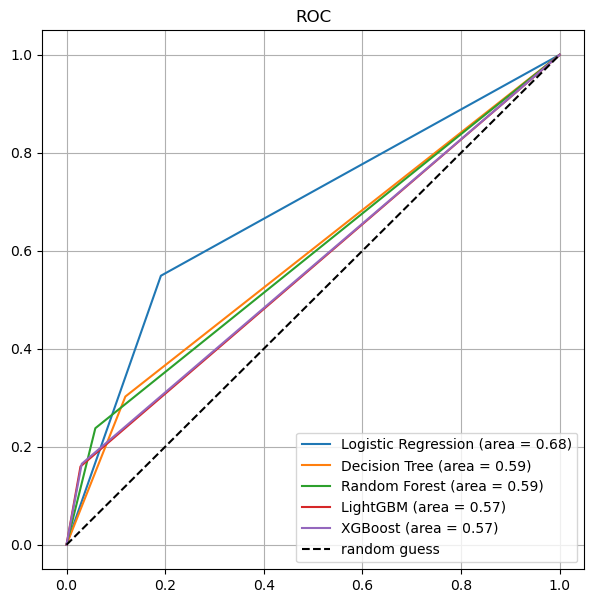

In [88]:
data = pd.read_csv('./CVD_cleaned.csv')



# 성별 원핫인코딩
data = pd.get_dummies(data, columns=['Sex'])
sex_columns = ['Sex_Female', 'Sex_Male']
for column in sex_columns:
    data[column] = data[column].map({True: 1, False: 0})

# Yes, No -> 1, 0
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 
                  'Depression', 'Arthritis', 'Smoking_History','Exercise']

# diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Arthritis, Smoking_History, Exercise
for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}

data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 1,
    'Within the past 5 years': 2,
    'Within the past 2 years': 3,
    'Within the past year': 4
    
}
data['Checkup'] = data['Checkup'].map(checkup_mapping)



age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)    

X = data.drop("Heart_Disease", axis = 1)
y = data['Heart_Disease']




# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)





# resample
smote = SMOTE(random_state=13)
X_train, y_train = smote.fit_resample(X_train, y_train)







tmp = []
# LR
lr_clf = LogisticRegression(random_state=13)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

acc = accuracy_score(y_test, lr_pred)
pre = precision_score(y_test, lr_pred)
re = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
aucc = roc_auc_score(y_test, lr_pred)

# 결과 df로 저장
tmp.append(['lr_clf', acc, pre, re, f1, aucc])

# AUC
pred = lr_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr1, tpr1, thresholds = roc_curve(y_test, binary_pred)
roc_auc1 = auc(fpr1, tpr1)






# DT
dt_clf = DecisionTreeClassifier(random_state=13)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

acc = accuracy_score(y_test, dt_pred)
pre = precision_score(y_test, dt_pred)
re = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
aucc = roc_auc_score(y_test, dt_pred)

tmp.append(['dt_clf', acc, pre, re, f1, aucc])

pred = dt_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr2, tpr2, thresholds = roc_curve(y_test, binary_pred)
roc_auc2 = auc(fpr2, tpr2)






# RF
rf_clf = RandomForestClassifier(random_state=13)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

acc = accuracy_score(y_test, rf_pred)
pre = precision_score(y_test, rf_pred)
re = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
aucc = roc_auc_score(y_test, rf_pred)

tmp.append(['rf_clf', acc, pre, re, f1, aucc])

pred = rf_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr3, tpr3, thresholds = roc_curve(y_test, binary_pred)
roc_auc3 = auc(fpr3, tpr3)





# LGBM
lgbm_clf = LGBMClassifier(random_state=13)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

acc = accuracy_score(y_test, lgbm_pred)
pre = precision_score(y_test, lgbm_pred)
re = recall_score(y_test, lgbm_pred)
f1 = f1_score(y_test, lgbm_pred)
aucc = roc_auc_score(y_test, lgbm_pred)

tmp.append(['lgbm_clf', acc, pre, re, f1, aucc])

pred = lgbm_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr4, tpr4, thresholds = roc_curve(y_test, binary_pred)
roc_auc4 = auc(fpr4, tpr4)




# XGBoost
xgb_clf = XGBClassifier(random_sate=13)

xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

acc = accuracy_score(y_test, xgb_pred)
pre = precision_score(y_test, xgb_pred)
re = recall_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
aucc = roc_auc_score(y_test, xgb_pred)

tmp.append(['xgb_clf', acc, pre, re, f1, aucc])

pred = xgb_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr5, tpr5, thresholds = roc_curve(y_test, binary_pred)
roc_auc5 = auc(fpr5, tpr5)



col_names = ['model_names', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
df = pd.DataFrame(tmp, columns=col_names)
print(df)

plt.figure(figsize=(7, 7))

plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Decision Tree (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Random Forest (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='LightGBM (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label='XGBoost (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.title('ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Trial 8
- age category 5단위
- bmi outlier 제거 x
- scaling o: StandardScaler()
- resampling o: SMOTE
- gridsearch x
>유의미한 차이를 보이지 않음.

  model_names  accuracy  precision    recall        f1   roc_auc
0      lr_clf  0.803079   0.209623  0.518222  0.298501  0.673178
1      dt_clf  0.833951   0.182608  0.303164  0.227926  0.591901
2      rf_clf  0.886727   0.265731  0.227473  0.245118  0.586093
3    lgbm_clf  0.906137   0.334158  0.162195  0.218388  0.566884
4     xgb_clf  0.904534   0.321893  0.163396  0.216762  0.566560


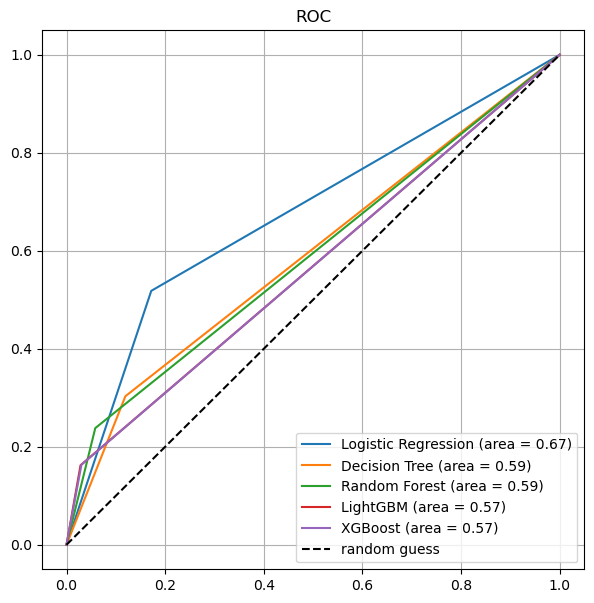

In [89]:
data = pd.read_csv('./CVD_cleaned.csv')



# 성별 원핫인코딩
data = pd.get_dummies(data, columns=['Sex'])
sex_columns = ['Sex_Female', 'Sex_Male']
for column in sex_columns:
    data[column] = data[column].map({True: 1, False: 0})

# Yes, No -> 1, 0
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 
                  'Depression', 'Arthritis', 'Smoking_History','Exercise']

# diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Arthritis, Smoking_History, Exercise
for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}

data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 1,
    'Within the past 5 years': 2,
    'Within the past 2 years': 3,
    'Within the past year': 4
    
}
data['Checkup'] = data['Checkup'].map(checkup_mapping)



age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)    

X = data.drop("Heart_Disease", axis = 1)
y = data['Heart_Disease']




# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)




# resample
smote = SMOTE(random_state=13)
X_train, y_train = smote.fit_resample(X_train, y_train)




# scaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)




tmp = []
# LR
lr_clf = LogisticRegression(random_state=13)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

acc = accuracy_score(y_test, lr_pred)
pre = precision_score(y_test, lr_pred)
re = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
aucc = roc_auc_score(y_test, lr_pred)

# 결과 df로 저장
tmp.append(['lr_clf', acc, pre, re, f1, aucc])

# AUC
pred = lr_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr1, tpr1, thresholds = roc_curve(y_test, binary_pred)
roc_auc1 = auc(fpr1, tpr1)






# DT
dt_clf = DecisionTreeClassifier(random_state=13)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

acc = accuracy_score(y_test, dt_pred)
pre = precision_score(y_test, dt_pred)
re = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
aucc = roc_auc_score(y_test, dt_pred)

tmp.append(['dt_clf', acc, pre, re, f1, aucc])

pred = dt_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr2, tpr2, thresholds = roc_curve(y_test, binary_pred)
roc_auc2 = auc(fpr2, tpr2)






# RF
rf_clf = RandomForestClassifier(random_state=13)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

acc = accuracy_score(y_test, rf_pred)
pre = precision_score(y_test, rf_pred)
re = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
aucc = roc_auc_score(y_test, rf_pred)

tmp.append(['rf_clf', acc, pre, re, f1, aucc])

pred = rf_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr3, tpr3, thresholds = roc_curve(y_test, binary_pred)
roc_auc3 = auc(fpr3, tpr3)





# LGBM
lgbm_clf = LGBMClassifier(random_state=13)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

acc = accuracy_score(y_test, lgbm_pred)
pre = precision_score(y_test, lgbm_pred)
re = recall_score(y_test, lgbm_pred)
f1 = f1_score(y_test, lgbm_pred)
aucc = roc_auc_score(y_test, lgbm_pred)

tmp.append(['lgbm_clf', acc, pre, re, f1, aucc])

pred = lgbm_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr4, tpr4, thresholds = roc_curve(y_test, binary_pred)
roc_auc4 = auc(fpr4, tpr4)




# XGBoost
xgb_clf = XGBClassifier(random_sate=13)

xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

acc = accuracy_score(y_test, xgb_pred)
pre = precision_score(y_test, xgb_pred)
re = recall_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
aucc = roc_auc_score(y_test, xgb_pred)

tmp.append(['xgb_clf', acc, pre, re, f1, aucc])

pred = xgb_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr5, tpr5, thresholds = roc_curve(y_test, binary_pred)
roc_auc5 = auc(fpr5, tpr5)



col_names = ['model_names', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
df = pd.DataFrame(tmp, columns=col_names)
print(df)

plt.figure(figsize=(7, 7))

plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Decision Tree (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Random Forest (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='LightGBM (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label='XGBoost (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.title('ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Trial 9
- age category 5단위
- bmi outlier 제거 x
- scaling o: MinMaxScaler()
- resampling o: SMOTE
- gridsearch x
>유의미한 차이를 보이지 않음.

  model_names  accuracy  precision    recall        f1   roc_auc
0      lr_clf  0.802691   0.209404  0.519023  0.298411  0.673332
1      dt_clf  0.831070   0.175397  0.294353  0.219813  0.586316
2      rf_clf  0.884606   0.256948  0.225871  0.240409  0.584209
3    lgbm_clf  0.904211   0.323788  0.169804  0.222777  0.569306
4     xgb_clf  0.903660   0.318544  0.168202  0.220155  0.568276


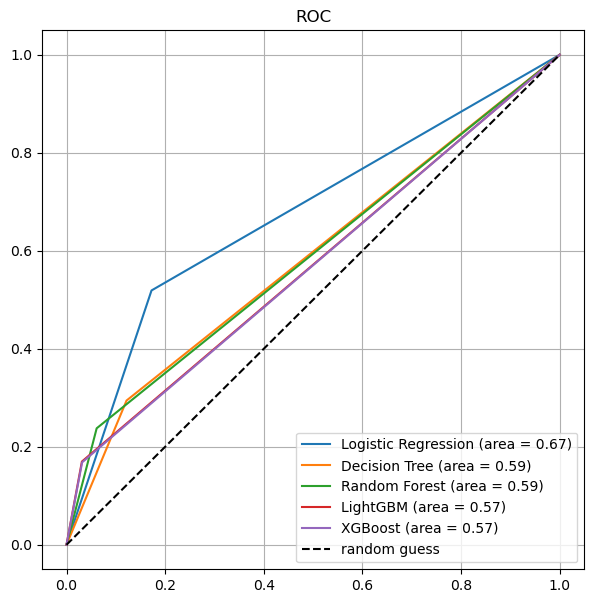

In [80]:
data = pd.read_csv('./CVD_cleaned.csv')



# 성별 원핫인코딩
data = pd.get_dummies(data, columns=['Sex'])
sex_columns = ['Sex_Female', 'Sex_Male']
for column in sex_columns:
    data[column] = data[column].map({True: 1, False: 0})

# Yes, No -> 1, 0
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 
                  'Depression', 'Arthritis', 'Smoking_History','Exercise']

# diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Arthritis, Smoking_History, Exercise
for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}

data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 1,
    'Within the past 5 years': 2,
    'Within the past 2 years': 3,
    'Within the past year': 4
    
}
data['Checkup'] = data['Checkup'].map(checkup_mapping)



age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)    

X = data.drop("Heart_Disease", axis = 1)
y = data['Heart_Disease']




# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)




# resample
smote = SMOTE(random_state=13)
X_train, y_train = smote.fit_resample(X_train, y_train)




# scaler
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)




tmp = []
# LR
lr_clf = LogisticRegression(random_state=13)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

acc = accuracy_score(y_test, lr_pred)
pre = precision_score(y_test, lr_pred)
re = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
aucc = roc_auc_score(y_test, lr_pred)

# 결과 df로 저장
tmp.append(['lr_clf', acc, pre, re, f1, aucc])

# AUC
pred = lr_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr1, tpr1, thresholds = roc_curve(y_test, binary_pred)
roc_auc1 = auc(fpr1, tpr1)






# DT
dt_clf = DecisionTreeClassifier(random_state=13)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

acc = accuracy_score(y_test, dt_pred)
pre = precision_score(y_test, dt_pred)
re = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
aucc = roc_auc_score(y_test, dt_pred)

tmp.append(['dt_clf', acc, pre, re, f1, aucc])

pred = dt_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr2, tpr2, thresholds = roc_curve(y_test, binary_pred)
roc_auc2 = auc(fpr2, tpr2)






# RF
rf_clf = RandomForestClassifier(random_state=13)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

acc = accuracy_score(y_test, rf_pred)
pre = precision_score(y_test, rf_pred)
re = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
aucc = roc_auc_score(y_test, rf_pred)

tmp.append(['rf_clf', acc, pre, re, f1, aucc])

pred = rf_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr3, tpr3, thresholds = roc_curve(y_test, binary_pred)
roc_auc3 = auc(fpr3, tpr3)





# LGBM
lgbm_clf = LGBMClassifier(random_state=13)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

acc = accuracy_score(y_test, lgbm_pred)
pre = precision_score(y_test, lgbm_pred)
re = recall_score(y_test, lgbm_pred)
f1 = f1_score(y_test, lgbm_pred)
aucc = roc_auc_score(y_test, lgbm_pred)

tmp.append(['lgbm_clf', acc, pre, re, f1, aucc])

pred = lgbm_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr4, tpr4, thresholds = roc_curve(y_test, binary_pred)
roc_auc4 = auc(fpr4, tpr4)




# XGBoost
xgb_clf = XGBClassifier(random_sate=13)

xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

acc = accuracy_score(y_test, xgb_pred)
pre = precision_score(y_test, xgb_pred)
re = recall_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
aucc = roc_auc_score(y_test, xgb_pred)

tmp.append(['xgb_clf', acc, pre, re, f1, aucc])

pred = xgb_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr5, tpr5, thresholds = roc_curve(y_test, binary_pred)
roc_auc5 = auc(fpr5, tpr5)



col_names = ['model_names', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
df = pd.DataFrame(tmp, columns=col_names)
print(df)

plt.figure(figsize=(7, 7))

plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Decision Tree (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Random Forest (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='LightGBM (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label='XGBoost (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.title('ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Trial 10
- age category 5단위
- bmi outlier 제거 x
- scaling o: RobustScaler()
- resampling o: SMOTE
- gridsearch x
>유의미한 차이를 보이지 않음.

  model_names  accuracy  precision    recall        f1   roc_auc
0      lr_clf  0.804488   0.210780  0.516820  0.299437  0.673305
1      dt_clf  0.835408   0.182599  0.297958  0.226432  0.590319
2      rf_clf  0.888265   0.266976  0.218863  0.240537  0.583003
3    lgbm_clf  0.904454   0.322240  0.164798  0.218071  0.567155
4     xgb_clf  0.905684   0.328524  0.159592  0.214825  0.565450


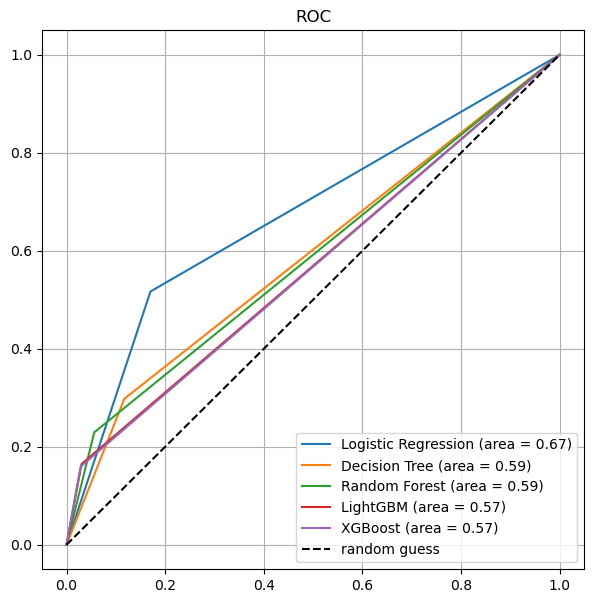

In [86]:
data = pd.read_csv('./CVD_cleaned.csv')



# 성별 원핫인코딩
data = pd.get_dummies(data, columns=['Sex'])
sex_columns = ['Sex_Female', 'Sex_Male']
for column in sex_columns:
    data[column] = data[column].map({True: 1, False: 0})

# Yes, No -> 1, 0
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 
                  'Depression', 'Arthritis', 'Smoking_History','Exercise']

# diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Arthritis, Smoking_History, Exercise
for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}

data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 0.5,
    'Within the past 5 years': 1,
    'Within the past 2 years': 3,
    'Within the past year': 4
    
}
data['Checkup'] = data['Checkup'].map(checkup_mapping)



age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)    



X = data.drop("Heart_Disease", axis = 1)
y = data['Heart_Disease']




# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)




# resample
smote = SMOTE(random_state=13)
X_train, y_train = smote.fit_resample(X_train, y_train)



# scaler
scaler = RobustScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)





tmp = []
# LR
lr_clf = LogisticRegression(random_state=13)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

acc = accuracy_score(y_test, lr_pred)
pre = precision_score(y_test, lr_pred)
re = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
aucc = roc_auc_score(y_test, lr_pred)

# 결과 df로 저장
tmp.append(['lr_clf', acc, pre, re, f1, aucc])

# AUC
pred = lr_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr1, tpr1, thresholds = roc_curve(y_test, binary_pred)
roc_auc1 = auc(fpr1, tpr1)






# DT
dt_clf = DecisionTreeClassifier(random_state=13)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

acc = accuracy_score(y_test, dt_pred)
pre = precision_score(y_test, dt_pred)
re = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
aucc = roc_auc_score(y_test, dt_pred)

tmp.append(['dt_clf', acc, pre, re, f1, aucc])

pred = dt_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr2, tpr2, thresholds = roc_curve(y_test, binary_pred)
roc_auc2 = auc(fpr2, tpr2)






# RF
rf_clf = RandomForestClassifier(random_state=13)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

acc = accuracy_score(y_test, rf_pred)
pre = precision_score(y_test, rf_pred)
re = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
aucc = roc_auc_score(y_test, rf_pred)

tmp.append(['rf_clf', acc, pre, re, f1, aucc])

pred = rf_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr3, tpr3, thresholds = roc_curve(y_test, binary_pred)
roc_auc3 = auc(fpr3, tpr3)





# LGBM
lgbm_clf = LGBMClassifier(random_state=13)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

acc = accuracy_score(y_test, lgbm_pred)
pre = precision_score(y_test, lgbm_pred)
re = recall_score(y_test, lgbm_pred)
f1 = f1_score(y_test, lgbm_pred)
aucc = roc_auc_score(y_test, lgbm_pred)

tmp.append(['lgbm_clf', acc, pre, re, f1, aucc])

pred = lgbm_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr4, tpr4, thresholds = roc_curve(y_test, binary_pred)
roc_auc4 = auc(fpr4, tpr4)




# XGBoost
xgb_clf = XGBClassifier(random_sate=13)

xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

acc = accuracy_score(y_test, xgb_pred)
pre = precision_score(y_test, xgb_pred)
re = recall_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
aucc = roc_auc_score(y_test, xgb_pred)

tmp.append(['xgb_clf', acc, pre, re, f1, aucc])

pred = xgb_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr5, tpr5, thresholds = roc_curve(y_test, binary_pred)
roc_auc5 = auc(fpr5, tpr5)



col_names = ['model_names', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
df = pd.DataFrame(tmp, columns=col_names)
print(df)

plt.figure(figsize=(7, 7))

plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Decision Tree (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Random Forest (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='LightGBM (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label='XGBoost (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.title('ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Trial 11 
- age category 5단위, 수치 2배
- bmi outlier 제거 x
- scaling x
- resampling o: SMOTE
- gridsearch x
>유의미한 차이를 보이지 않음. 

  model_names  accuracy  precision    recall        f1   roc_auc
0      lr_clf  0.790954   0.205504  0.553264  0.299691  0.682562
1      dt_clf  0.837853   0.186203  0.298358  0.229301  0.591832
2      rf_clf  0.891227   0.281369  0.222267  0.248350  0.586167
3    lgbm_clf  0.908598   0.342512  0.141970  0.200736  0.559000
4     xgb_clf  0.909488   0.353891  0.144774  0.205485  0.560762


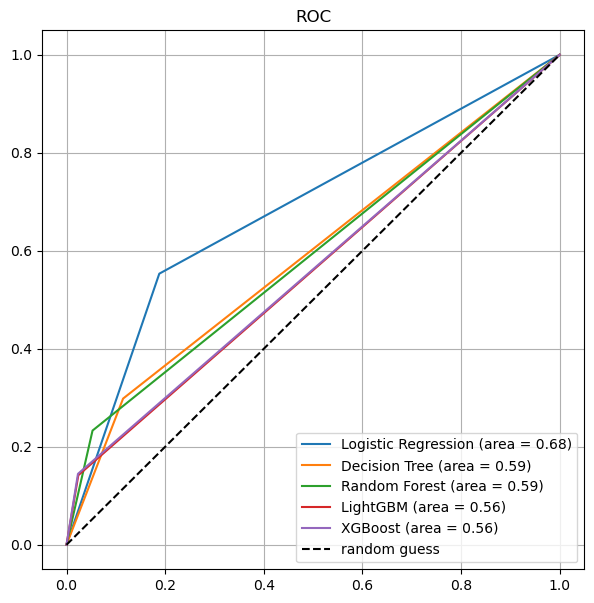

In [87]:
data = pd.read_csv('./CVD_cleaned.csv')



# 성별 원핫인코딩
data = pd.get_dummies(data, columns=['Sex'])
sex_columns = ['Sex_Female', 'Sex_Male']
for column in sex_columns:
    data[column] = data[column].map({True: 1, False: 0})

# Yes, No -> 1, 0
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 
                  'Depression', 'Arthritis', 'Smoking_History','Exercise']

# diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Arthritis, Smoking_History, Exercise
for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}

data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 0.5,
    'Within the past 5 years': 1,
    'Within the past 2 years': 3,
    'Within the past year': 4
    
}
data['Checkup'] = data['Checkup'].map(checkup_mapping)



age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)  
data['Age_Category'] = 2 * data['Age_Category']





X = data.drop("Heart_Disease", axis = 1)
y = data['Heart_Disease']




# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)




# resample
smote = SMOTE(random_state=13)
X_train, y_train = smote.fit_resample(X_train, y_train)






tmp = []
# LR
lr_clf = LogisticRegression(random_state=13)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

acc = accuracy_score(y_test, lr_pred)
pre = precision_score(y_test, lr_pred)
re = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
aucc = roc_auc_score(y_test, lr_pred)

# 결과 df로 저장
tmp.append(['lr_clf', acc, pre, re, f1, aucc])

# AUC
pred = lr_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr1, tpr1, thresholds = roc_curve(y_test, binary_pred)
roc_auc1 = auc(fpr1, tpr1)






# DT
dt_clf = DecisionTreeClassifier(random_state=13)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

acc = accuracy_score(y_test, dt_pred)
pre = precision_score(y_test, dt_pred)
re = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
aucc = roc_auc_score(y_test, dt_pred)

tmp.append(['dt_clf', acc, pre, re, f1, aucc])

pred = dt_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr2, tpr2, thresholds = roc_curve(y_test, binary_pred)
roc_auc2 = auc(fpr2, tpr2)






# RF
rf_clf = RandomForestClassifier(random_state=13)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

acc = accuracy_score(y_test, rf_pred)
pre = precision_score(y_test, rf_pred)
re = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
aucc = roc_auc_score(y_test, rf_pred)

tmp.append(['rf_clf', acc, pre, re, f1, aucc])

pred = rf_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr3, tpr3, thresholds = roc_curve(y_test, binary_pred)
roc_auc3 = auc(fpr3, tpr3)





# LGBM
lgbm_clf = LGBMClassifier(random_state=13)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

acc = accuracy_score(y_test, lgbm_pred)
pre = precision_score(y_test, lgbm_pred)
re = recall_score(y_test, lgbm_pred)
f1 = f1_score(y_test, lgbm_pred)
aucc = roc_auc_score(y_test, lgbm_pred)

tmp.append(['lgbm_clf', acc, pre, re, f1, aucc])

pred = lgbm_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr4, tpr4, thresholds = roc_curve(y_test, binary_pred)
roc_auc4 = auc(fpr4, tpr4)




# XGBoost
xgb_clf = XGBClassifier(random_sate=13)

xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

acc = accuracy_score(y_test, xgb_pred)
pre = precision_score(y_test, xgb_pred)
re = recall_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
aucc = roc_auc_score(y_test, xgb_pred)

tmp.append(['xgb_clf', acc, pre, re, f1, aucc])

pred = xgb_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr5, tpr5, thresholds = roc_curve(y_test, binary_pred)
roc_auc5 = auc(fpr5, tpr5)



col_names = ['model_names', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
df = pd.DataFrame(tmp, columns=col_names)
print(df)

plt.figure(figsize=(7, 7))

plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Decision Tree (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Random Forest (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='LightGBM (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label='XGBoost (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.title('ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Trial 12
- age category 5단위
- bmi outlier 제거 x
- scaling x
- resampling o: SMOTE(sampling_strategy='miniority')
- gridsearch x
>유의미한 차이를 보이지 않음. 

  model_names  accuracy  precision    recall        f1   roc_auc
0      lr_clf  0.788833   0.206846  0.568682  0.303354  0.688440
1      dt_clf  0.837270   0.190831  0.312575  0.236982  0.597998
2      rf_clf  0.891243   0.280550  0.220665  0.247030  0.585446
3    lgbm_clf  0.909683   0.349614  0.136163  0.195994  0.556942
4     xgb_clf  0.910427   0.357181  0.134962  0.195902  0.556799


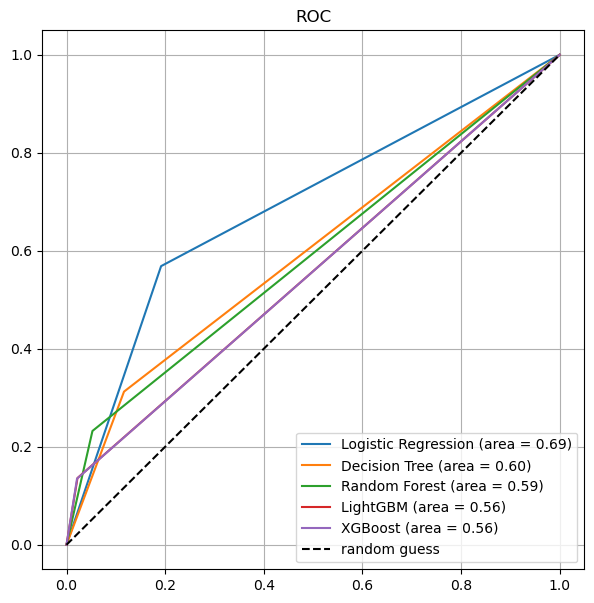

In [90]:
data = pd.read_csv('./CVD_cleaned.csv')



# 성별 원핫인코딩
data = pd.get_dummies(data, columns=['Sex'])
sex_columns = ['Sex_Female', 'Sex_Male']
for column in sex_columns:
    data[column] = data[column].map({True: 1, False: 0})

# Yes, No -> 1, 0
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 
                  'Depression', 'Arthritis', 'Smoking_History','Exercise']

# diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Arthritis, Smoking_History, Exercise
for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}

data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 0.5,
    'Within the past 5 years': 1,
    'Within the past 2 years': 3,
    'Within the past year': 4
    
}
data['Checkup'] = data['Checkup'].map(checkup_mapping)



age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)  
data['Age_Category'] = 2 * data['Age_Category']





X = data.drop("Heart_Disease", axis = 1)
y = data['Heart_Disease']




# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)




# resample
smote = SMOTE(random_state=13, sampling_strategy='minority')
X_train, y_train = smote.fit_resample(X_train, y_train)






tmp = []
# LR
lr_clf = LogisticRegression(random_state=13)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

acc = accuracy_score(y_test, lr_pred)
pre = precision_score(y_test, lr_pred)
re = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
aucc = roc_auc_score(y_test, lr_pred)

# 결과 df로 저장
tmp.append(['lr_clf', acc, pre, re, f1, aucc])

# AUC
pred = lr_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr1, tpr1, thresholds = roc_curve(y_test, binary_pred)
roc_auc1 = auc(fpr1, tpr1)






# DT
dt_clf = DecisionTreeClassifier(random_state=13)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

acc = accuracy_score(y_test, dt_pred)
pre = precision_score(y_test, dt_pred)
re = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
aucc = roc_auc_score(y_test, dt_pred)

tmp.append(['dt_clf', acc, pre, re, f1, aucc])

pred = dt_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr2, tpr2, thresholds = roc_curve(y_test, binary_pred)
roc_auc2 = auc(fpr2, tpr2)






# RF
rf_clf = RandomForestClassifier(random_state=13)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

acc = accuracy_score(y_test, rf_pred)
pre = precision_score(y_test, rf_pred)
re = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
aucc = roc_auc_score(y_test, rf_pred)

tmp.append(['rf_clf', acc, pre, re, f1, aucc])

pred = rf_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr3, tpr3, thresholds = roc_curve(y_test, binary_pred)
roc_auc3 = auc(fpr3, tpr3)





# LGBM
lgbm_clf = LGBMClassifier(random_state=13)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

acc = accuracy_score(y_test, lgbm_pred)
pre = precision_score(y_test, lgbm_pred)
re = recall_score(y_test, lgbm_pred)
f1 = f1_score(y_test, lgbm_pred)
aucc = roc_auc_score(y_test, lgbm_pred)

tmp.append(['lgbm_clf', acc, pre, re, f1, aucc])

pred = lgbm_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr4, tpr4, thresholds = roc_curve(y_test, binary_pred)
roc_auc4 = auc(fpr4, tpr4)




# XGBoost
xgb_clf = XGBClassifier(random_sate=13)

xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

acc = accuracy_score(y_test, xgb_pred)
pre = precision_score(y_test, xgb_pred)
re = recall_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
aucc = roc_auc_score(y_test, xgb_pred)

tmp.append(['xgb_clf', acc, pre, re, f1, aucc])

pred = xgb_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr5, tpr5, thresholds = roc_curve(y_test, binary_pred)
roc_auc5 = auc(fpr5, tpr5)



col_names = ['model_names', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
df = pd.DataFrame(tmp, columns=col_names)
print(df)

plt.figure(figsize=(7, 7))

plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Decision Tree (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Random Forest (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='LightGBM (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label='XGBoost (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.title('ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Trial 13
- age category 5단위
- bmi outlier 제거 x
- scaling x
- resampling o: SMOTE, tomek
- gridsearch x
>유의미한 차이를 보이지 않음.
>\
>시간 많이 걸림

  model_names  accuracy  precision    recall        f1   roc_auc
0      lr_clf  0.793576   0.206907  0.548258  0.300433  0.681706
1      dt_clf  0.837076   0.187731  0.305166  0.232459  0.594514
2      rf_clf  0.891292   0.278279  0.216260  0.243380  0.583463
3    lgbm_clf  0.909116   0.346838  0.140569  0.200057  0.558642
4     xgb_clf  0.909812   0.353924  0.139968  0.200603  0.558747


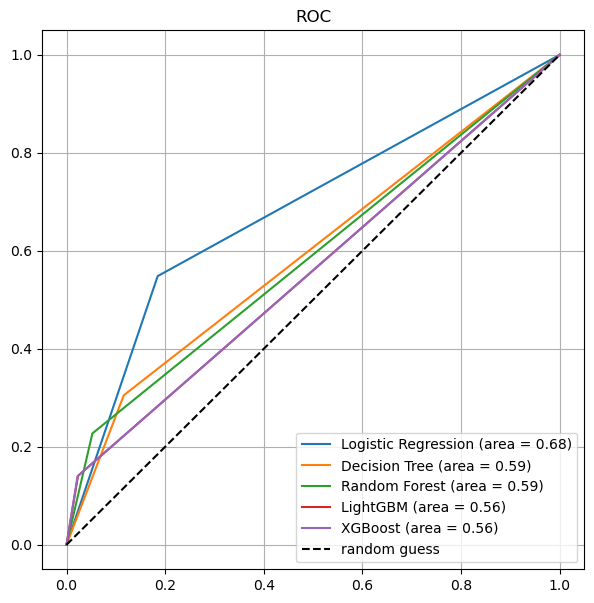

In [93]:
data = pd.read_csv('./CVD_cleaned.csv')



# 성별 원핫인코딩
data = pd.get_dummies(data, columns=['Sex'])
sex_columns = ['Sex_Female', 'Sex_Male']
for column in sex_columns:
    data[column] = data[column].map({True: 1, False: 0})

# Yes, No -> 1, 0
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 
                  'Depression', 'Arthritis', 'Smoking_History','Exercise']

# diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Arthritis, Smoking_History, Exercise
for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}

data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 0.5,
    'Within the past 5 years': 1,
    'Within the past 2 years': 3,
    'Within the past year': 4
    
}
data['Checkup'] = data['Checkup'].map(checkup_mapping)



age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)  
data['Age_Category'] = 2 * data['Age_Category']





X = data.drop("Heart_Disease", axis = 1)
y = data['Heart_Disease']




# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)




# resample
smoteto = SMOTETomek(tomek=TomekLinks())
X_train, y_train = smoteto.fit_resample(X_train, y_train)






tmp = []
# LR
lr_clf = LogisticRegression(random_state=13)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

acc = accuracy_score(y_test, lr_pred)
pre = precision_score(y_test, lr_pred)
re = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
aucc = roc_auc_score(y_test, lr_pred)

# 결과 df로 저장
tmp.append(['lr_clf', acc, pre, re, f1, aucc])

# AUC
pred = lr_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr1, tpr1, thresholds = roc_curve(y_test, binary_pred)
roc_auc1 = auc(fpr1, tpr1)






# DT
dt_clf = DecisionTreeClassifier(random_state=13)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

acc = accuracy_score(y_test, dt_pred)
pre = precision_score(y_test, dt_pred)
re = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
aucc = roc_auc_score(y_test, dt_pred)

tmp.append(['dt_clf', acc, pre, re, f1, aucc])

pred = dt_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr2, tpr2, thresholds = roc_curve(y_test, binary_pred)
roc_auc2 = auc(fpr2, tpr2)






# RF
rf_clf = RandomForestClassifier(random_state=13)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

acc = accuracy_score(y_test, rf_pred)
pre = precision_score(y_test, rf_pred)
re = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
aucc = roc_auc_score(y_test, rf_pred)

tmp.append(['rf_clf', acc, pre, re, f1, aucc])

pred = rf_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr3, tpr3, thresholds = roc_curve(y_test, binary_pred)
roc_auc3 = auc(fpr3, tpr3)





# LGBM
lgbm_clf = LGBMClassifier(random_state=13)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

acc = accuracy_score(y_test, lgbm_pred)
pre = precision_score(y_test, lgbm_pred)
re = recall_score(y_test, lgbm_pred)
f1 = f1_score(y_test, lgbm_pred)
aucc = roc_auc_score(y_test, lgbm_pred)

tmp.append(['lgbm_clf', acc, pre, re, f1, aucc])

pred = lgbm_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr4, tpr4, thresholds = roc_curve(y_test, binary_pred)
roc_auc4 = auc(fpr4, tpr4)




# XGBoost
xgb_clf = XGBClassifier(random_sate=13)

xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

acc = accuracy_score(y_test, xgb_pred)
pre = precision_score(y_test, xgb_pred)
re = recall_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
aucc = roc_auc_score(y_test, xgb_pred)

tmp.append(['xgb_clf', acc, pre, re, f1, aucc])

pred = xgb_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr5, tpr5, thresholds = roc_curve(y_test, binary_pred)
roc_auc5 = auc(fpr5, tpr5)



col_names = ['model_names', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
df = pd.DataFrame(tmp, columns=col_names)
print(df)

plt.figure(figsize=(7, 7))

plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Decision Tree (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Random Forest (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='LightGBM (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label='XGBoost (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.title('ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Trial 14 
- age category 5단위
- bmi outlier 제거 x
- scaling x
- resampling o: ADASYN
- gridsearch x
>유의미한 차이를 보이지 않음. 
>\
>SMOTE와 비슷

  model_names  accuracy  precision    recall        f1   roc_auc
0      lr_clf  0.788250   0.200563  0.542251  0.292820  0.676069
1      dt_clf  0.837545   0.186075  0.299159  0.229440  0.592030
2      rf_clf  0.889981   0.273845  0.218462  0.243039  0.583754
3    lgbm_clf  0.908873   0.340852  0.136163  0.194592  0.556501
4     xgb_clf  0.910961   0.358501  0.128354  0.189030  0.554076


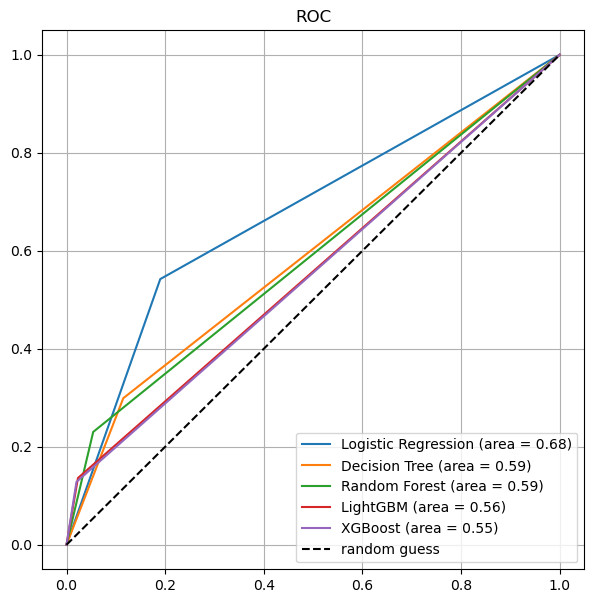

In [95]:
data = pd.read_csv('./CVD_cleaned.csv')



# 성별 원핫인코딩
data = pd.get_dummies(data, columns=['Sex'])
sex_columns = ['Sex_Female', 'Sex_Male']
for column in sex_columns:
    data[column] = data[column].map({True: 1, False: 0})

# Yes, No -> 1, 0
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 
                  'Depression', 'Arthritis', 'Smoking_History','Exercise']

# diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Arthritis, Smoking_History, Exercise
for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}

data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 0.5,
    'Within the past 5 years': 1,
    'Within the past 2 years': 3,
    'Within the past year': 4
    
}
data['Checkup'] = data['Checkup'].map(checkup_mapping)



age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)  
data['Age_Category'] = 2 * data['Age_Category']





X = data.drop("Heart_Disease", axis = 1)
y = data['Heart_Disease']




# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)




# resample
adas = ADASYN(random_state=13)
X_train, y_train = adas.fit_resample(X_train, y_train)






tmp = []
# LR
lr_clf = LogisticRegression(random_state=13)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

acc = accuracy_score(y_test, lr_pred)
pre = precision_score(y_test, lr_pred)
re = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
aucc = roc_auc_score(y_test, lr_pred)

# 결과 df로 저장
tmp.append(['lr_clf', acc, pre, re, f1, aucc])

# AUC
pred = lr_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr1, tpr1, thresholds = roc_curve(y_test, binary_pred)
roc_auc1 = auc(fpr1, tpr1)






# DT
dt_clf = DecisionTreeClassifier(random_state=13)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

acc = accuracy_score(y_test, dt_pred)
pre = precision_score(y_test, dt_pred)
re = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
aucc = roc_auc_score(y_test, dt_pred)

tmp.append(['dt_clf', acc, pre, re, f1, aucc])

pred = dt_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr2, tpr2, thresholds = roc_curve(y_test, binary_pred)
roc_auc2 = auc(fpr2, tpr2)






# RF
rf_clf = RandomForestClassifier(random_state=13)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

acc = accuracy_score(y_test, rf_pred)
pre = precision_score(y_test, rf_pred)
re = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
aucc = roc_auc_score(y_test, rf_pred)

tmp.append(['rf_clf', acc, pre, re, f1, aucc])

pred = rf_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr3, tpr3, thresholds = roc_curve(y_test, binary_pred)
roc_auc3 = auc(fpr3, tpr3)





# LGBM
lgbm_clf = LGBMClassifier(random_state=13)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

acc = accuracy_score(y_test, lgbm_pred)
pre = precision_score(y_test, lgbm_pred)
re = recall_score(y_test, lgbm_pred)
f1 = f1_score(y_test, lgbm_pred)
aucc = roc_auc_score(y_test, lgbm_pred)

tmp.append(['lgbm_clf', acc, pre, re, f1, aucc])

pred = lgbm_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr4, tpr4, thresholds = roc_curve(y_test, binary_pred)
roc_auc4 = auc(fpr4, tpr4)




# XGBoost
xgb_clf = XGBClassifier(random_sate=13)

xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

acc = accuracy_score(y_test, xgb_pred)
pre = precision_score(y_test, xgb_pred)
re = recall_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
aucc = roc_auc_score(y_test, xgb_pred)

tmp.append(['xgb_clf', acc, pre, re, f1, aucc])

pred = xgb_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr5, tpr5, thresholds = roc_curve(y_test, binary_pred)
roc_auc5 = auc(fpr5, tpr5)



col_names = ['model_names', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
df = pd.DataFrame(tmp, columns=col_names)
print(df)

plt.figure(figsize=(7, 7))

plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Decision Tree (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Random Forest (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='LightGBM (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label='XGBoost (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.title('ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Trial 15 
- age category 5단위
- bmi outlier 제거 x
- scaling x
- resampling o: BorderlineSMOTE
- gridsearch x
>유의미한 차이를 보이지 않음. 
>\
>SMOTE와 비슷

  model_names  accuracy  precision    recall        f1   roc_auc
0      lr_clf  0.804099   0.216378  0.542851  0.309422  0.684965
1      dt_clf  0.842450   0.192338  0.296556  0.233339  0.593511
2      rf_clf  0.893219   0.282691  0.208650  0.240092  0.581041
3    lgbm_clf  0.906623   0.334190  0.156187  0.212882  0.564409
4     xgb_clf  0.908274   0.345304  0.150180  0.209322  0.562567


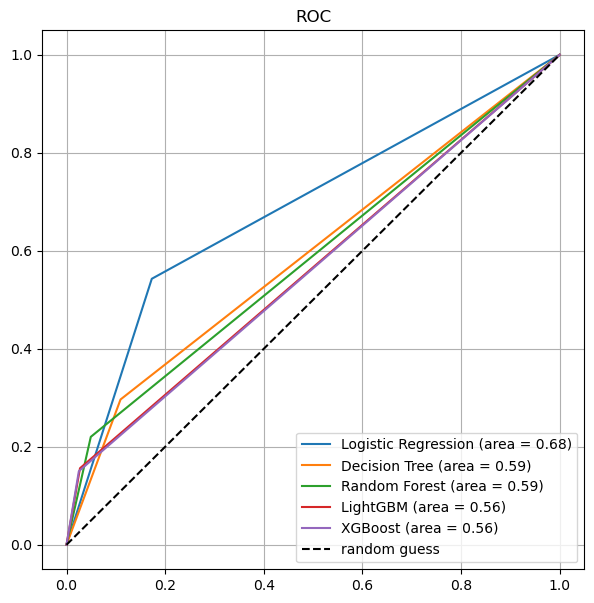

In [97]:
data = pd.read_csv('./CVD_cleaned.csv')



# 성별 원핫인코딩
data = pd.get_dummies(data, columns=['Sex'])
sex_columns = ['Sex_Female', 'Sex_Male']
for column in sex_columns:
    data[column] = data[column].map({True: 1, False: 0})

# Yes, No -> 1, 0
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 
                  'Depression', 'Arthritis', 'Smoking_History','Exercise']

# diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Arthritis, Smoking_History, Exercise
for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}

data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 0.5,
    'Within the past 5 years': 1,
    'Within the past 2 years': 3,
    'Within the past year': 4
    
}
data['Checkup'] = data['Checkup'].map(checkup_mapping)



age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)  
data['Age_Category'] = 2 * data['Age_Category']





X = data.drop("Heart_Disease", axis = 1)
y = data['Heart_Disease']




# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)




# resample
bs = BorderlineSMOTE(random_state=13)
X_train, y_train = bs.fit_resample(X_train, y_train)






tmp = []
# LR
lr_clf = LogisticRegression(random_state=13)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

acc = accuracy_score(y_test, lr_pred)
pre = precision_score(y_test, lr_pred)
re = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
aucc = roc_auc_score(y_test, lr_pred)

# 결과 df로 저장
tmp.append(['lr_clf', acc, pre, re, f1, aucc])

# AUC
pred = lr_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr1, tpr1, thresholds = roc_curve(y_test, binary_pred)
roc_auc1 = auc(fpr1, tpr1)






# DT
dt_clf = DecisionTreeClassifier(random_state=13)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

acc = accuracy_score(y_test, dt_pred)
pre = precision_score(y_test, dt_pred)
re = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
aucc = roc_auc_score(y_test, dt_pred)

tmp.append(['dt_clf', acc, pre, re, f1, aucc])

pred = dt_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr2, tpr2, thresholds = roc_curve(y_test, binary_pred)
roc_auc2 = auc(fpr2, tpr2)






# RF
rf_clf = RandomForestClassifier(random_state=13)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

acc = accuracy_score(y_test, rf_pred)
pre = precision_score(y_test, rf_pred)
re = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
aucc = roc_auc_score(y_test, rf_pred)

tmp.append(['rf_clf', acc, pre, re, f1, aucc])

pred = rf_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr3, tpr3, thresholds = roc_curve(y_test, binary_pred)
roc_auc3 = auc(fpr3, tpr3)





# LGBM
lgbm_clf = LGBMClassifier(random_state=13)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

acc = accuracy_score(y_test, lgbm_pred)
pre = precision_score(y_test, lgbm_pred)
re = recall_score(y_test, lgbm_pred)
f1 = f1_score(y_test, lgbm_pred)
aucc = roc_auc_score(y_test, lgbm_pred)

tmp.append(['lgbm_clf', acc, pre, re, f1, aucc])

pred = lgbm_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr4, tpr4, thresholds = roc_curve(y_test, binary_pred)
roc_auc4 = auc(fpr4, tpr4)




# XGBoost
xgb_clf = XGBClassifier(random_sate=13)

xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

acc = accuracy_score(y_test, xgb_pred)
pre = precision_score(y_test, xgb_pred)
re = recall_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
aucc = roc_auc_score(y_test, xgb_pred)

tmp.append(['xgb_clf', acc, pre, re, f1, aucc])

pred = xgb_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr5, tpr5, thresholds = roc_curve(y_test, binary_pred)
roc_auc5 = auc(fpr5, tpr5)



col_names = ['model_names', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
df = pd.DataFrame(tmp, columns=col_names)
print(df)

plt.figure(figsize=(7, 7))

plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Decision Tree (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Random Forest (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='LightGBM (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label='XGBoost (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.title('ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Trial 16 - svmSMOTE
- age category 5단위
- bmi outlier 제거 x
- scaling x
- resampling o: svmSMOTE
- gridsearch x
>지금까지 시행한 oversampling 방법 중 효과 가장 좋음. 

  model_names  accuracy  precision    recall        f1   roc_auc
0      lr_clf  0.821292   0.247135  0.591510  0.348616  0.716506
1      dt_clf  0.848942   0.201267  0.292551  0.238472  0.595216
2      rf_clf  0.903887   0.324395  0.174409  0.226852  0.571230
3    lgbm_clf  0.908323   0.379978  0.212054  0.272202  0.590810
4     xgb_clf  0.910848   0.384511  0.171005  0.236729  0.573464


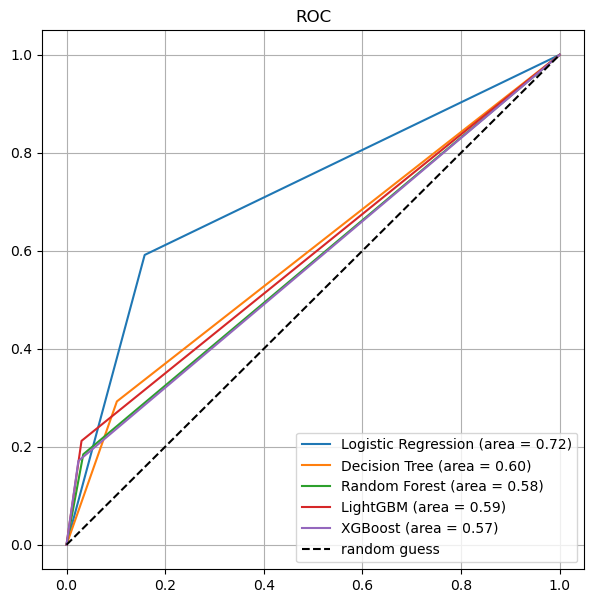

In [100]:
data = pd.read_csv('./CVD_cleaned.csv')



# 성별 원핫인코딩
data = pd.get_dummies(data, columns=['Sex'])
sex_columns = ['Sex_Female', 'Sex_Male']
for column in sex_columns:
    data[column] = data[column].map({True: 1, False: 0})

# Yes, No -> 1, 0
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 
                  'Depression', 'Arthritis', 'Smoking_History','Exercise']

# diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Arthritis, Smoking_History, Exercise
for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}

data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 0.5,
    'Within the past 5 years': 1,
    'Within the past 2 years': 3,
    'Within the past year': 4
    
}
data['Checkup'] = data['Checkup'].map(checkup_mapping)



age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)  
data['Age_Category'] = 2 * data['Age_Category']





X = data.drop("Heart_Disease", axis = 1)
y = data['Heart_Disease']




# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)




# resample
svsmote = SVMSMOTE(random_state=13)
X_train, y_train = svsmote.fit_resample(X_train, y_train)






tmp = []
# LR
lr_clf = LogisticRegression(random_state=13)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

acc = accuracy_score(y_test, lr_pred)
pre = precision_score(y_test, lr_pred)
re = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
aucc = roc_auc_score(y_test, lr_pred)

# 결과 df로 저장
tmp.append(['lr_clf', acc, pre, re, f1, aucc])

# AUC
pred = lr_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr1, tpr1, thresholds = roc_curve(y_test, binary_pred)
roc_auc1 = auc(fpr1, tpr1)






# DT
dt_clf = DecisionTreeClassifier(random_state=13)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

acc = accuracy_score(y_test, dt_pred)
pre = precision_score(y_test, dt_pred)
re = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
aucc = roc_auc_score(y_test, dt_pred)

tmp.append(['dt_clf', acc, pre, re, f1, aucc])

pred = dt_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr2, tpr2, thresholds = roc_curve(y_test, binary_pred)
roc_auc2 = auc(fpr2, tpr2)






# RF
rf_clf = RandomForestClassifier(random_state=13)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

acc = accuracy_score(y_test, rf_pred)
pre = precision_score(y_test, rf_pred)
re = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
aucc = roc_auc_score(y_test, rf_pred)

tmp.append(['rf_clf', acc, pre, re, f1, aucc])

pred = rf_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr3, tpr3, thresholds = roc_curve(y_test, binary_pred)
roc_auc3 = auc(fpr3, tpr3)





# LGBM
lgbm_clf = LGBMClassifier(random_state=13)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

acc = accuracy_score(y_test, lgbm_pred)
pre = precision_score(y_test, lgbm_pred)
re = recall_score(y_test, lgbm_pred)
f1 = f1_score(y_test, lgbm_pred)
aucc = roc_auc_score(y_test, lgbm_pred)

tmp.append(['lgbm_clf', acc, pre, re, f1, aucc])

pred = lgbm_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr4, tpr4, thresholds = roc_curve(y_test, binary_pred)
roc_auc4 = auc(fpr4, tpr4)




# XGBoost
xgb_clf = XGBClassifier(random_sate=13)

xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

acc = accuracy_score(y_test, xgb_pred)
pre = precision_score(y_test, xgb_pred)
re = recall_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
aucc = roc_auc_score(y_test, xgb_pred)

tmp.append(['xgb_clf', acc, pre, re, f1, aucc])

pred = xgb_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr5, tpr5, thresholds = roc_curve(y_test, binary_pred)
roc_auc5 = auc(fpr5, tpr5)



col_names = ['model_names', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
df = pd.DataFrame(tmp, columns=col_names)
print(df)

plt.figure(figsize=(7, 7))

plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Decision Tree (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Random Forest (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='LightGBM (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label='XGBoost (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.title('ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Trial 17
- age category 5단위
- bmi outlier 제거 x
- scaling o: RobustScaler()
- resampling o: svmSMoTE
- gridsearch x
>수치 떨어짐

  model_names  accuracy  precision    recall        f1   roc_auc
0      lr_clf  0.830438   0.248992  0.544253  0.341672  0.699932
1      dt_clf  0.848926   0.201075  0.292151  0.238204  0.595025
2      rf_clf  0.903822   0.323650  0.174009  0.226332  0.571012
3    lgbm_clf  0.908566   0.382963  0.214257  0.274782  0.591946
4     xgb_clf  0.911431   0.387447  0.164397  0.230845  0.570768


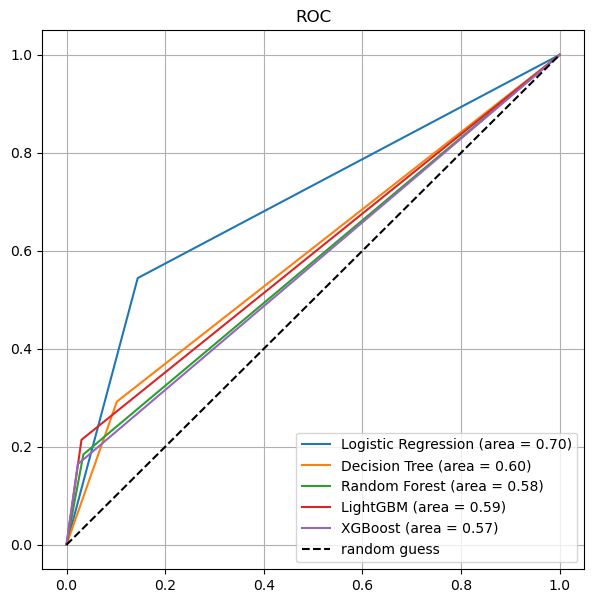

In [101]:
data = pd.read_csv('./CVD_cleaned.csv')



# 성별 원핫인코딩
data = pd.get_dummies(data, columns=['Sex'])
sex_columns = ['Sex_Female', 'Sex_Male']
for column in sex_columns:
    data[column] = data[column].map({True: 1, False: 0})

# Yes, No -> 1, 0
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 
                  'Depression', 'Arthritis', 'Smoking_History','Exercise']

# diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Arthritis, Smoking_History, Exercise
for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}

data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 0.5,
    'Within the past 5 years': 1,
    'Within the past 2 years': 3,
    'Within the past year': 4
    
}
data['Checkup'] = data['Checkup'].map(checkup_mapping)



age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)  
data['Age_Category'] = 2 * data['Age_Category']





X = data.drop("Heart_Disease", axis = 1)
y = data['Heart_Disease']




# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)




# resample
svsmote = SVMSMOTE(random_state=13)
X_train, y_train = svsmote.fit_resample(X_train, y_train)





# scaler
scaler = RobustScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)






tmp = []
# LR
lr_clf = LogisticRegression(random_state=13)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

acc = accuracy_score(y_test, lr_pred)
pre = precision_score(y_test, lr_pred)
re = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
aucc = roc_auc_score(y_test, lr_pred)

# 결과 df로 저장
tmp.append(['lr_clf', acc, pre, re, f1, aucc])

# AUC
pred = lr_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr1, tpr1, thresholds = roc_curve(y_test, binary_pred)
roc_auc1 = auc(fpr1, tpr1)






# DT
dt_clf = DecisionTreeClassifier(random_state=13)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

acc = accuracy_score(y_test, dt_pred)
pre = precision_score(y_test, dt_pred)
re = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
aucc = roc_auc_score(y_test, dt_pred)

tmp.append(['dt_clf', acc, pre, re, f1, aucc])

pred = dt_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr2, tpr2, thresholds = roc_curve(y_test, binary_pred)
roc_auc2 = auc(fpr2, tpr2)






# RF
rf_clf = RandomForestClassifier(random_state=13)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

acc = accuracy_score(y_test, rf_pred)
pre = precision_score(y_test, rf_pred)
re = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
aucc = roc_auc_score(y_test, rf_pred)

tmp.append(['rf_clf', acc, pre, re, f1, aucc])

pred = rf_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr3, tpr3, thresholds = roc_curve(y_test, binary_pred)
roc_auc3 = auc(fpr3, tpr3)





# LGBM
lgbm_clf = LGBMClassifier(random_state=13)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

acc = accuracy_score(y_test, lgbm_pred)
pre = precision_score(y_test, lgbm_pred)
re = recall_score(y_test, lgbm_pred)
f1 = f1_score(y_test, lgbm_pred)
aucc = roc_auc_score(y_test, lgbm_pred)

tmp.append(['lgbm_clf', acc, pre, re, f1, aucc])

pred = lgbm_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr4, tpr4, thresholds = roc_curve(y_test, binary_pred)
roc_auc4 = auc(fpr4, tpr4)




# XGBoost
xgb_clf = XGBClassifier(random_sate=13)

xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

acc = accuracy_score(y_test, xgb_pred)
pre = precision_score(y_test, xgb_pred)
re = recall_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
aucc = roc_auc_score(y_test, xgb_pred)

tmp.append(['xgb_clf', acc, pre, re, f1, aucc])

pred = xgb_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr5, tpr5, thresholds = roc_curve(y_test, binary_pred)
roc_auc5 = auc(fpr5, tpr5)



col_names = ['model_names', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
df = pd.DataFrame(tmp, columns=col_names)
print(df)

plt.figure(figsize=(7, 7))

plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Decision Tree (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Random Forest (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='LightGBM (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label='XGBoost (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.title('ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Trial 18
- age category 5단위
- bmi outlier 제거 x
- scaling o: StandardScaler()
- resampling o: svmSMOTE
- gridsearch x
>수치 떨어짐

  model_names  accuracy  precision    recall        f1   roc_auc
0      lr_clf  0.830487   0.249107  0.544453  0.341819  0.700050
1      dt_clf  0.848991   0.201268  0.292351  0.238406  0.595151
2      rf_clf  0.903790   0.323671  0.174409  0.226675  0.571177
3    lgbm_clf  0.908485   0.381347  0.212054  0.272552  0.590898
4     xgb_clf  0.911431   0.387447  0.164397  0.230845  0.570768


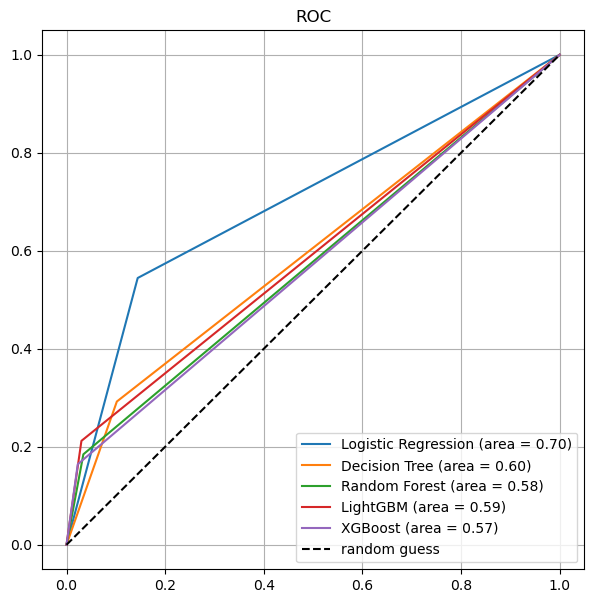

In [102]:
data = pd.read_csv('./CVD_cleaned.csv')



# 성별 원핫인코딩
data = pd.get_dummies(data, columns=['Sex'])
sex_columns = ['Sex_Female', 'Sex_Male']
for column in sex_columns:
    data[column] = data[column].map({True: 1, False: 0})

# Yes, No -> 1, 0
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 
                  'Depression', 'Arthritis', 'Smoking_History','Exercise']

# diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Arthritis, Smoking_History, Exercise
for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}

data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 0.5,
    'Within the past 5 years': 1,
    'Within the past 2 years': 3,
    'Within the past year': 4
    
}
data['Checkup'] = data['Checkup'].map(checkup_mapping)



age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)  
data['Age_Category'] = 2 * data['Age_Category']





X = data.drop("Heart_Disease", axis = 1)
y = data['Heart_Disease']




# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)




# resample
svsmote = SVMSMOTE(random_state=13)
X_train, y_train = svsmote.fit_resample(X_train, y_train)





# scaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)






tmp = []
# LR
lr_clf = LogisticRegression(random_state=13)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

acc = accuracy_score(y_test, lr_pred)
pre = precision_score(y_test, lr_pred)
re = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
aucc = roc_auc_score(y_test, lr_pred)

# 결과 df로 저장
tmp.append(['lr_clf', acc, pre, re, f1, aucc])

# AUC
pred = lr_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr1, tpr1, thresholds = roc_curve(y_test, binary_pred)
roc_auc1 = auc(fpr1, tpr1)






# DT
dt_clf = DecisionTreeClassifier(random_state=13)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

acc = accuracy_score(y_test, dt_pred)
pre = precision_score(y_test, dt_pred)
re = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
aucc = roc_auc_score(y_test, dt_pred)

tmp.append(['dt_clf', acc, pre, re, f1, aucc])

pred = dt_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr2, tpr2, thresholds = roc_curve(y_test, binary_pred)
roc_auc2 = auc(fpr2, tpr2)






# RF
rf_clf = RandomForestClassifier(random_state=13)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

acc = accuracy_score(y_test, rf_pred)
pre = precision_score(y_test, rf_pred)
re = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
aucc = roc_auc_score(y_test, rf_pred)

tmp.append(['rf_clf', acc, pre, re, f1, aucc])

pred = rf_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr3, tpr3, thresholds = roc_curve(y_test, binary_pred)
roc_auc3 = auc(fpr3, tpr3)





# LGBM
lgbm_clf = LGBMClassifier(random_state=13)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

acc = accuracy_score(y_test, lgbm_pred)
pre = precision_score(y_test, lgbm_pred)
re = recall_score(y_test, lgbm_pred)
f1 = f1_score(y_test, lgbm_pred)
aucc = roc_auc_score(y_test, lgbm_pred)

tmp.append(['lgbm_clf', acc, pre, re, f1, aucc])

pred = lgbm_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr4, tpr4, thresholds = roc_curve(y_test, binary_pred)
roc_auc4 = auc(fpr4, tpr4)




# XGBoost
xgb_clf = XGBClassifier(random_sate=13)

xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

acc = accuracy_score(y_test, xgb_pred)
pre = precision_score(y_test, xgb_pred)
re = recall_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
aucc = roc_auc_score(y_test, xgb_pred)

tmp.append(['xgb_clf', acc, pre, re, f1, aucc])

pred = xgb_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr5, tpr5, thresholds = roc_curve(y_test, binary_pred)
roc_auc5 = auc(fpr5, tpr5)



col_names = ['model_names', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
df = pd.DataFrame(tmp, columns=col_names)
print(df)

plt.figure(figsize=(7, 7))

plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Decision Tree (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Random Forest (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='LightGBM (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label='XGBoost (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.title('ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Trial 19
- age category 5단위
- bmi outlier 제거 x
- scaling o: MinMaxScaler()
- resampling o: svmSMOTE
- gridsearch x
>수치 떨어짐

  model_names  accuracy  precision    recall        f1   roc_auc
0      lr_clf  0.830616   0.249519  0.545455  0.342405  0.700577
1      dt_clf  0.849039   0.201434  0.292551  0.238589  0.595269
2      rf_clf  0.903936   0.323308  0.172207  0.224719  0.570252
3    lgbm_clf  0.909116   0.386280  0.210853  0.272798  0.590693
4     xgb_clf  0.910848   0.384511  0.171005  0.236729  0.573464


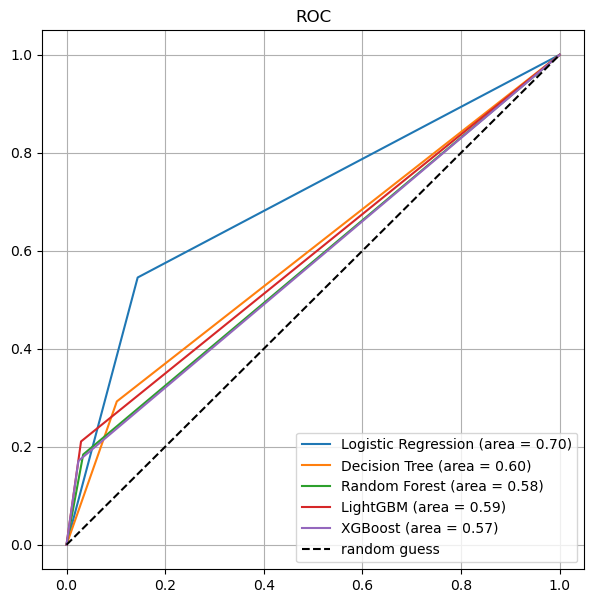

In [104]:
data = pd.read_csv('./CVD_cleaned.csv')



# 성별 원핫인코딩
data = pd.get_dummies(data, columns=['Sex'])
sex_columns = ['Sex_Female', 'Sex_Male']
for column in sex_columns:
    data[column] = data[column].map({True: 1, False: 0})

# Yes, No -> 1, 0
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 
                  'Depression', 'Arthritis', 'Smoking_History','Exercise']

# diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Arthritis, Smoking_History, Exercise
for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}

data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 0.5,
    'Within the past 5 years': 1,
    'Within the past 2 years': 3,
    'Within the past year': 4
    
}
data['Checkup'] = data['Checkup'].map(checkup_mapping)



age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)  
data['Age_Category'] = 2 * data['Age_Category']





X = data.drop("Heart_Disease", axis = 1)
y = data['Heart_Disease']




# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)




# resample
svsmote = SVMSMOTE(random_state=13)
X_train, y_train = svsmote.fit_resample(X_train, y_train)





# scaler
scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)






tmp = []
# LR
lr_clf = LogisticRegression(random_state=13)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

acc = accuracy_score(y_test, lr_pred)
pre = precision_score(y_test, lr_pred)
re = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
aucc = roc_auc_score(y_test, lr_pred)

# 결과 df로 저장
tmp.append(['lr_clf', acc, pre, re, f1, aucc])

# AUC
pred = lr_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr1, tpr1, thresholds = roc_curve(y_test, binary_pred)
roc_auc1 = auc(fpr1, tpr1)






# DT
dt_clf = DecisionTreeClassifier(random_state=13)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

acc = accuracy_score(y_test, dt_pred)
pre = precision_score(y_test, dt_pred)
re = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
aucc = roc_auc_score(y_test, dt_pred)

tmp.append(['dt_clf', acc, pre, re, f1, aucc])

pred = dt_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr2, tpr2, thresholds = roc_curve(y_test, binary_pred)
roc_auc2 = auc(fpr2, tpr2)






# RF
rf_clf = RandomForestClassifier(random_state=13)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

acc = accuracy_score(y_test, rf_pred)
pre = precision_score(y_test, rf_pred)
re = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
aucc = roc_auc_score(y_test, rf_pred)

tmp.append(['rf_clf', acc, pre, re, f1, aucc])

pred = rf_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr3, tpr3, thresholds = roc_curve(y_test, binary_pred)
roc_auc3 = auc(fpr3, tpr3)





# LGBM
lgbm_clf = LGBMClassifier(random_state=13)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

acc = accuracy_score(y_test, lgbm_pred)
pre = precision_score(y_test, lgbm_pred)
re = recall_score(y_test, lgbm_pred)
f1 = f1_score(y_test, lgbm_pred)
aucc = roc_auc_score(y_test, lgbm_pred)

tmp.append(['lgbm_clf', acc, pre, re, f1, aucc])

pred = lgbm_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr4, tpr4, thresholds = roc_curve(y_test, binary_pred)
roc_auc4 = auc(fpr4, tpr4)




# XGBoost
xgb_clf = XGBClassifier(random_sate=13)

xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

acc = accuracy_score(y_test, xgb_pred)
pre = precision_score(y_test, xgb_pred)
re = recall_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
aucc = roc_auc_score(y_test, xgb_pred)

tmp.append(['xgb_clf', acc, pre, re, f1, aucc])

pred = xgb_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr5, tpr5, thresholds = roc_curve(y_test, binary_pred)
roc_auc5 = auc(fpr5, tpr5)



col_names = ['model_names', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
df = pd.DataFrame(tmp, columns=col_names)
print(df)

plt.figure(figsize=(7, 7))

plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Decision Tree (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Random Forest (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='LightGBM (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label='XGBoost (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.title('ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Trial 20 
- age category 5단위
- bmi outlier 제거 x
- scaling x
- resampling o: svmSMOTE(sampling_strategy='minority')
- gridsearch x
>유의밈한 차이 없음

  model_names  accuracy  precision    recall        f1   roc_auc
0      lr_clf  0.821292   0.247135  0.591510  0.348616  0.716506
1      dt_clf  0.848942   0.201267  0.292551  0.238472  0.595216
2      rf_clf  0.903887   0.324395  0.174409  0.226852  0.571230
3    lgbm_clf  0.908323   0.379978  0.212054  0.272202  0.590810
4     xgb_clf  0.910848   0.384511  0.171005  0.236729  0.573464


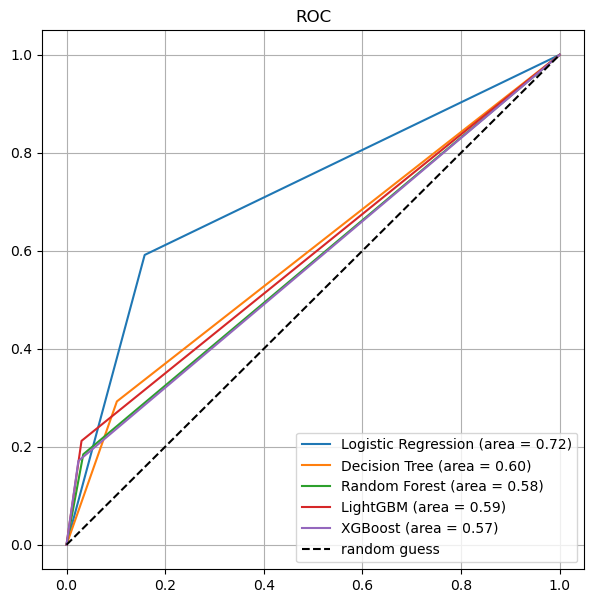

In [105]:
data = pd.read_csv('./CVD_cleaned.csv')



# 성별 원핫인코딩
data = pd.get_dummies(data, columns=['Sex'])
sex_columns = ['Sex_Female', 'Sex_Male']
for column in sex_columns:
    data[column] = data[column].map({True: 1, False: 0})

# Yes, No -> 1, 0
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 
                  'Depression', 'Arthritis', 'Smoking_History','Exercise']

# diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Arthritis, Smoking_History, Exercise
for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}

data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 0.5,
    'Within the past 5 years': 1,
    'Within the past 2 years': 3,
    'Within the past year': 4
    
}
data['Checkup'] = data['Checkup'].map(checkup_mapping)



age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)  
data['Age_Category'] = 2 * data['Age_Category']





X = data.drop("Heart_Disease", axis = 1)
y = data['Heart_Disease']




# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)




# resample
svsmote = SVMSMOTE(random_state=13, sampling_strategy='minority')
X_train, y_train = svsmote.fit_resample(X_train, y_train)








tmp = []
# LR
lr_clf = LogisticRegression(random_state=13)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

acc = accuracy_score(y_test, lr_pred)
pre = precision_score(y_test, lr_pred)
re = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
aucc = roc_auc_score(y_test, lr_pred)

# 결과 df로 저장
tmp.append(['lr_clf', acc, pre, re, f1, aucc])

# AUC
pred = lr_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr1, tpr1, thresholds = roc_curve(y_test, binary_pred)
roc_auc1 = auc(fpr1, tpr1)






# DT
dt_clf = DecisionTreeClassifier(random_state=13)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

acc = accuracy_score(y_test, dt_pred)
pre = precision_score(y_test, dt_pred)
re = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
aucc = roc_auc_score(y_test, dt_pred)

tmp.append(['dt_clf', acc, pre, re, f1, aucc])

pred = dt_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr2, tpr2, thresholds = roc_curve(y_test, binary_pred)
roc_auc2 = auc(fpr2, tpr2)






# RF
rf_clf = RandomForestClassifier(random_state=13)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

acc = accuracy_score(y_test, rf_pred)
pre = precision_score(y_test, rf_pred)
re = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
aucc = roc_auc_score(y_test, rf_pred)

tmp.append(['rf_clf', acc, pre, re, f1, aucc])

pred = rf_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr3, tpr3, thresholds = roc_curve(y_test, binary_pred)
roc_auc3 = auc(fpr3, tpr3)





# LGBM
lgbm_clf = LGBMClassifier(random_state=13)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

acc = accuracy_score(y_test, lgbm_pred)
pre = precision_score(y_test, lgbm_pred)
re = recall_score(y_test, lgbm_pred)
f1 = f1_score(y_test, lgbm_pred)
aucc = roc_auc_score(y_test, lgbm_pred)

tmp.append(['lgbm_clf', acc, pre, re, f1, aucc])

pred = lgbm_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr4, tpr4, thresholds = roc_curve(y_test, binary_pred)
roc_auc4 = auc(fpr4, tpr4)




# XGBoost
xgb_clf = XGBClassifier(random_sate=13)

xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

acc = accuracy_score(y_test, xgb_pred)
pre = precision_score(y_test, xgb_pred)
re = recall_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
aucc = roc_auc_score(y_test, xgb_pred)

tmp.append(['xgb_clf', acc, pre, re, f1, aucc])

pred = xgb_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr5, tpr5, thresholds = roc_curve(y_test, binary_pred)
roc_auc5 = auc(fpr5, tpr5)



col_names = ['model_names', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
df = pd.DataFrame(tmp, columns=col_names)
print(df)

plt.figure(figsize=(7, 7))

plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Decision Tree (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Random Forest (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='LightGBM (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label='XGBoost (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.title('ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# Trial 21
- age category 5단위
- bmi outlier 제거 x
- scaling x
- resampling o: svmSMOTE()
- class_weight='balanced', scale_pos_weight='11'
- gridsearch x
>xgboost 성능 좋아짐. 

  model_names  accuracy  precision    recall        f1   roc_auc
0      lr_clf  0.821292   0.247135  0.591510  0.348616  0.716506
1      dt_clf  0.848942   0.201267  0.292551  0.238472  0.595216
2      rf_clf  0.903887   0.324395  0.174409  0.226852  0.571230
3    lgbm_clf  0.908323   0.379978  0.212054  0.272202  0.590810
4     xgb_clf  0.727251   0.196145  0.766119  0.312327  0.744976


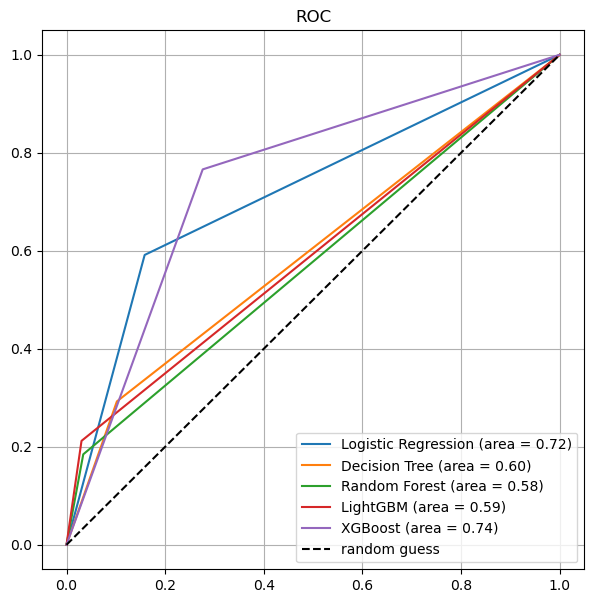

In [112]:
data = pd.read_csv('./CVD_cleaned.csv')



# 성별 원핫인코딩
data = pd.get_dummies(data, columns=['Sex'])
sex_columns = ['Sex_Female', 'Sex_Male']
for column in sex_columns:
    data[column] = data[column].map({True: 1, False: 0})

# Yes, No -> 1, 0
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 
                  'Depression', 'Arthritis', 'Smoking_History','Exercise']

# diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

# Heart_Disease, Skin_Cancer, Other_Cancer, Depression, Arthritis, Smoking_History, Exercise
for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

# General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}

data['General_Health'] = data['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 0.5,
    'Within the past 5 years': 1,
    'Within the past 2 years': 3,
    'Within the past year': 4
    
}
data['Checkup'] = data['Checkup'].map(checkup_mapping)



age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)  
data['Age_Category'] = 2 * data['Age_Category']





X = data.drop("Heart_Disease", axis = 1)
y = data['Heart_Disease']




# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)




# resample
svsmote = SVMSMOTE(random_state=13, sampling_strategy='minority')
X_train, y_train = svsmote.fit_resample(X_train, y_train)








tmp = []
# LR
lr_clf = LogisticRegression(random_state=13, class_weight='balanced')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

acc = accuracy_score(y_test, lr_pred)
pre = precision_score(y_test, lr_pred)
re = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
aucc = roc_auc_score(y_test, lr_pred)

# 결과 df로 저장
tmp.append(['lr_clf', acc, pre, re, f1, aucc])

# AUC
pred = lr_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr1, tpr1, thresholds = roc_curve(y_test, binary_pred)
roc_auc1 = auc(fpr1, tpr1)






# DT
dt_clf = DecisionTreeClassifier(random_state=13, class_weight='balanced')
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

acc = accuracy_score(y_test, dt_pred)
pre = precision_score(y_test, dt_pred)
re = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
aucc = roc_auc_score(y_test, dt_pred)

tmp.append(['dt_clf', acc, pre, re, f1, aucc])

pred = dt_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr2, tpr2, thresholds = roc_curve(y_test, binary_pred)
roc_auc2 = auc(fpr2, tpr2)






# RF
rf_clf = RandomForestClassifier(random_state=13, class_weight='balanced')
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

acc = accuracy_score(y_test, rf_pred)
pre = precision_score(y_test, rf_pred)
re = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
aucc = roc_auc_score(y_test, rf_pred)

tmp.append(['rf_clf', acc, pre, re, f1, aucc])

pred = rf_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr3, tpr3, thresholds = roc_curve(y_test, binary_pred)
roc_auc3 = auc(fpr3, tpr3)





# LGBM
lgbm_clf = LGBMClassifier(random_state=13, class_weight='balanced')
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

acc = accuracy_score(y_test, lgbm_pred)
pre = precision_score(y_test, lgbm_pred)
re = recall_score(y_test, lgbm_pred)
f1 = f1_score(y_test, lgbm_pred)
aucc = roc_auc_score(y_test, lgbm_pred)

tmp.append(['lgbm_clf', acc, pre, re, f1, aucc])

pred = lgbm_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr4, tpr4, thresholds = roc_curve(y_test, binary_pred)
roc_auc4 = auc(fpr4, tpr4)




# XGBoost
xgb_clf = XGBClassifier(random_sate=13, scale_pos_weight=10)  # 음성 데이터가 11배 더 많음

xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)

acc = accuracy_score(y_test, xgb_pred)
pre = precision_score(y_test, xgb_pred)
re = recall_score(y_test, xgb_pred)
f1 = f1_score(y_test, xgb_pred)
aucc = roc_auc_score(y_test, xgb_pred)

tmp.append(['xgb_clf', acc, pre, re, f1, aucc])

pred = xgb_clf.predict_proba(X_test)[:, 1]
binary_pred = (pred>=0.5).astype(int)
fpr5, tpr5, thresholds = roc_curve(y_test, binary_pred)
roc_auc5 = auc(fpr5, tpr5)



col_names = ['model_names', 'accuracy', 'precision', 'recall', 'f1', 'roc_auc']
df = pd.DataFrame(tmp, columns=col_names)
print(df)

plt.figure(figsize=(7, 7))

plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Decision Tree (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Random Forest (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='LightGBM (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label='XGBoost (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.title('ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()
